# Modelos no Supervisados

------------------------------------------------------


### Data Science and Machine Learning

#### Febrero 2023

**Aurora Cobo Aguilera**

**The Valley**

------------------------------------------------------

# Contenidos que se van a tratar a lo largo de la sesión
---

- Parte I: [Reducción de dimensionalidad y extracción de características con un modelo lineal: PCA](#PCA)
- Parte II: [Clustering o agrupación de datos con K-MEANS](#kmeans)
- Parte III: [Estimación de densidades de probabilidad con modelos de mezcla Gaussianos](#GMM)

In [2]:
from IPython.core.display import Image, display

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

In [4]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import pandas as pd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from skimage import io

# Configuración de las figuras matplotlib
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams.update({'font.size': 8})

In [5]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,color='r')
    ax.annotate('', v1, v0, arrowprops=arrowprops)


In [12]:
from scipy.stats import multivariate_normal, norm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import silhouette_score
from warnings import filterwarnings
from sklearn.decomposition import PCA
from sklearn import neighbors
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


filterwarnings('ignore')

In [7]:
def load_spam():
    data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data',header=None)
    data.columns=["wf_make",         
        "wf_address",      
        "wf_all",          
        "wf_3d",           
        "wf_our",          
        "wf_over",         
        "wf_remove",       
        "wf_internet",     
        "wf_order",        
        "wf_mail",         
        "wf_receive",      
        "wf_will",         
        "wf_people",       
        "wf_report",       
        "wf_addresses",    
        "wf_free",         
        "wf_business",     
        "wf_email",        
        "wf_you",          
        "wf_credit",       
        "wf_your",         
        "wf_font",         
        "wf_000",          
        "wf_money",        
        "wf_hp",           
        "wf_hpl",          
        "wf_george",       
        "wf_650",          
        "wf_lab",          
        "wf_labs",         
        "wf_telnet",       
        "wf_857",          
        "wf_data",         
        "wf_415",          
        "wf_85",           
        "wf_technology",   
        "wf_1999",         
        "wf_parts",        
        "wf_pm",           
        "wf_direct",       
        "wf_cs",           
        "wf_meeting",      
        "wf_original",     
        "wf_project",      
        "wf_re",           
        "wf_edu",          
        "wf_table",        
        "wf_conference",   
        "cf_;",            
        "cf_(",            
        "cf_[",            
        "cf_!",            
        "cf_$",            
        "cf_#",            
        "cap_average", 
        "cap_longest", 
        "cap_total",
        "target"]
    return data

In [8]:
def load_wine():
    data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)
    
    data.columns = ["Wine_type", "Alcohol", "Malic_acid", "Ash", "Alcalinity", "Magnesium", "Total_phenols","Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins",
                 "Color_intensity", "Hue", "OD280-OD315_diluted","Proline"]
    return data

# Aprendizaje  no supervisado
---

- No se dispone de un (*target*) para cada observación
- Detectar o descubrir **patrones** tales como grupos en las observaciones.
- Se hace una predicción por cada *target*
- Ejemplos típicos: *K means*, *PCA*, *GMMs*, *spectral clustering*, *CCA*
- Aplicaciones:
 - agrupar colecciones de datos
 - limpieza de *outliers*
 - segmentar vídeo o audio
 - segmentación de clientes
 - organización de colecciones de documentos
 - aprendizaje de funciones de densidad de probabilidad



<a id='PCA'></a>

# Parte I: Análisis de Componentes Principales (PCA)
---

PCA es un método de aprendizaje no supervisado muy eficiente para reducir la dimensionalidad de conjunto de datos. Supongamos que tenemos $N$ datos de dimensión $D$, $\mathbf{x}_{n}\in\mathbb{R}^D$ para $n=1,\ldots,N$. Supongamos que son vectores columna de dimensión $D\times 1$, esto es $\mathbf{x}^T_{n}=[x_{n1}, x_{n2}, \ldots, x_{nD}]$. Además, por simplicidad suponemos que los datos tienen media cero

$$\overline{\mathbf{x}} = \frac{1}{N}\sum_{n=1}^{N}\mathbf{x}_{n}=\mathbf{0}$$

En PCA, vamos a realizar una reducción de dimensionalidad lineal. Esto es, para cada dato $\bf x$, calculamos una representación $\mathbf{z}\in\mathbb{R}^K$ en un espacio de dimensión $K$, donde $K<D$, mediante una multiplicación matricial 

$$ {\bf z} = [z_{1}, z_{2}, \ldots, z_{K}] = {\bf x}^T {\bf U}$$

donde la matriz de transformación $\bf U$ tiene dimensiones $D\times K$ 

$${\bf U}=[\mathbf{u}_{1},\mathbf{u}_{2},\ldots,\mathbf{u}_{K}]$$

y $\mathbf{u}_{j}$, $j=1\ldots K$, son las columnas de $\bf U$. Además, estas columnas son ortonormales

$$\mathbf{u}_{j}^T\mathbf{u}_{j} = 1$$

$$\mathbf{u}_{j}^T\mathbf{u}_{j} = 0 ~~i \neq j$$ 

En estas condiciones, observad que $z_{j}= {\bf x}^T \mathbf{u}_j$ es la **proyección** de $\bf x$ sobre $\mathbf{u}_j$. 


<img src='http://www.tsc.uc3m.es/~olmos/BBVA/proyeccionv3.jpeg' width=600 />

Finalmente, puesto que $\bf U$ está formada por columnas ortonormales y por tanto $\bf UU^T=I$, dado el vector $\bf z$ podemos reconstruir el vector en el espacio de dimensión $D$ de la forma

$$\tilde{\mathbf{x}} = \mathbf{U} {\bf z}^T  $$

En general $\tilde{\mathbf{x}}\neq \mathbf{x}$, puesto que al reducir dimensionalidad siempre perdemos cierta información. Caracterizaremos este error midiendo el error cuadrático medio

$$J = \frac{1}{N}\sum_{n=1}^{D} ||\mathbf{x}_n - \tilde{\mathbf{x}}_n||^2_2 =\frac{1}{N}\sum_{n=1}^{D} ||\mathbf{x}_n - \mathbf{U}\mathbf{z}_n^T||^2_2$$

## Un ejemplo sintético en dos dimensiones

Supongamos el siguiente conjunto de datos

In [8]:
# Fijamos la semilla
rng = np.random.RandomState(1)
A = rng.rand(2, 2)

X = (A@rng.randn(2, 100)).T

print("Hemos generado {0:d} datos de {1:d} dimensiones".format(X.shape[0],X.shape[1]))

Hemos generado 100 datos de 2 dimensiones


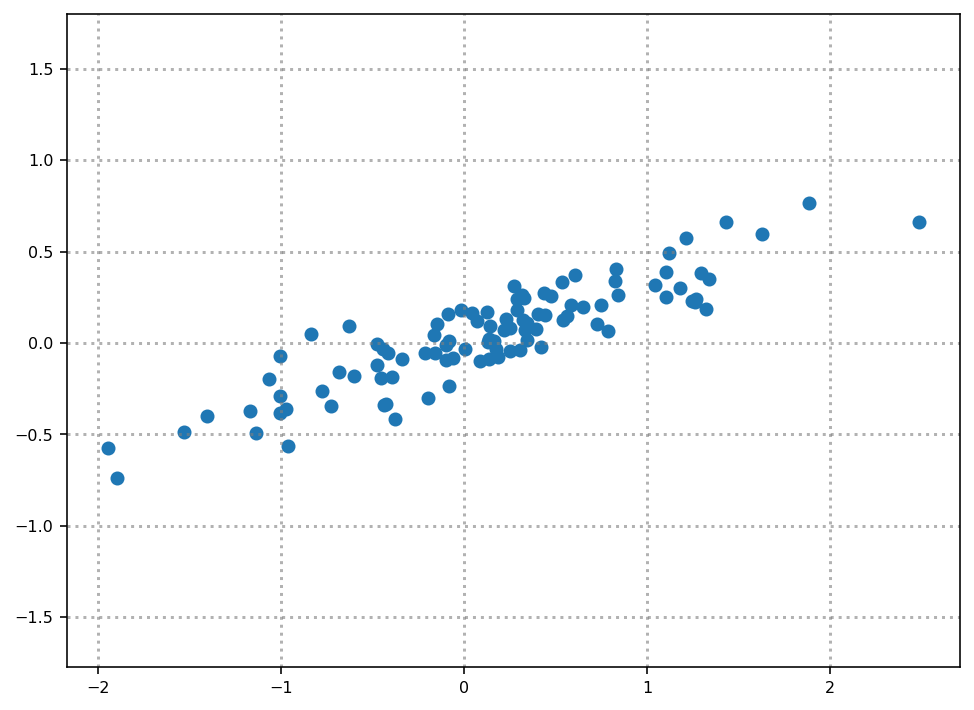

In [9]:
plt.scatter(X[:, 0], X[:, 1])
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.axis('equal')
plt.show()

Ciertamente, los datos siguen una tendencia lineal que nos dice que no perderíamos mucha información si proyectáramos cada punto en una línea recta definida por un vector unitario $\mathbf{u}_1$. A continuación vamos a estudiar el error de reconstrucción $J$ para distintos valores de $\mathbf{u}_1$. En cada caso, vamos a representar también la **varianza de los datos proyectados sobre $\mathbf{u}_1$**.

Por ejemplo, para $\mathbf{u}_1 = [\cos(\pi/4),\sin(\pi/4)]$ vamos a dibujar el histograma de la proyección de los datos sobre el vector y el histograma del error cuadrático de reconstrucción

El error de reconstrucción J es 0.16
La varianza de los datos proyectados en el vector u es 0.56


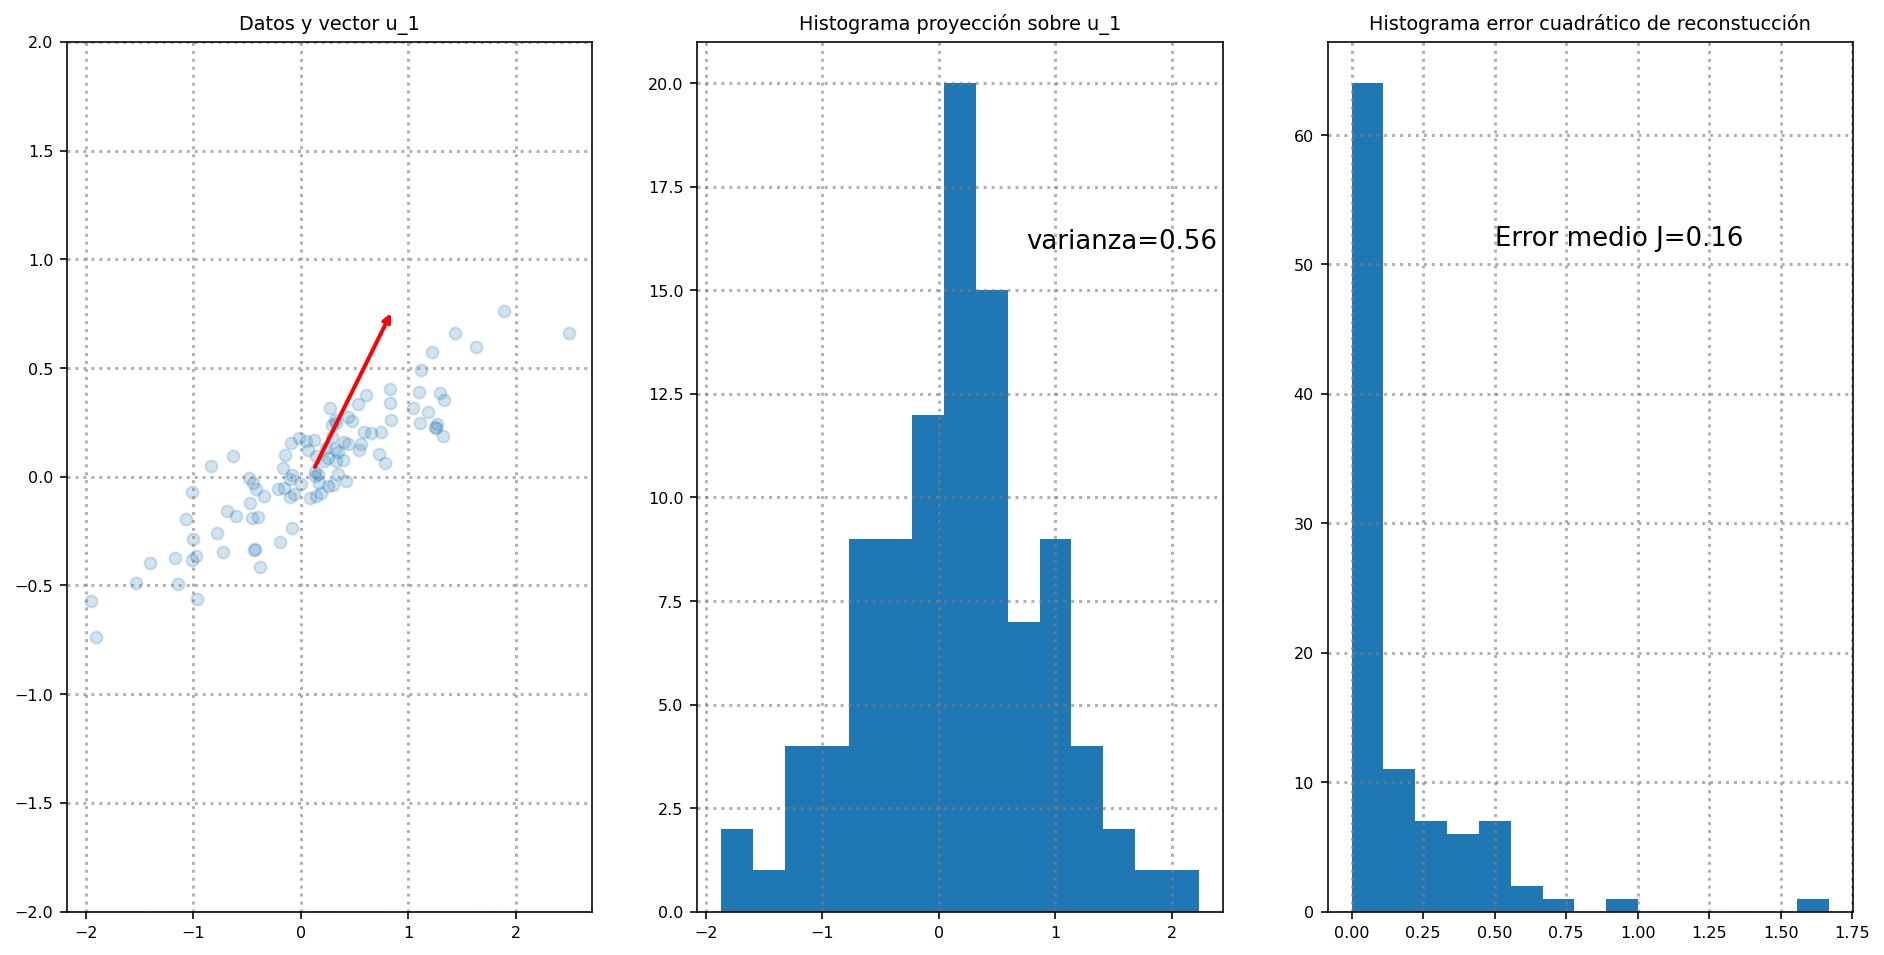

In [10]:
a = np.pi/4

u = np.array([np.cos(a),np.sin(a)]).reshape([-1,1]) # Pasamos a cartesianas


Z = X @ u # Proyecciones sobre u de los datos X

X_r = Z @ u.T

J = np.mean(np.linalg.norm(X-X_r,axis=1)**2)

varianza = np.var(Z)

print("El error de reconstrucción J es {0:.2f}".format(J))
print("La varianza de los datos proyectados en el vector u es {0:.2f}".format(varianza))

nbins = 15

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))
ax_l.set_ylim([-1,1])
ax_l.scatter(X[:, 0], X[:, 1], alpha=0.2)
ax_l.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
draw_vector(np.mean(X,axis=0).reshape(2,1), np.mean(X,axis=0).reshape(2,1) + u,ax_l)
ax_l.set_ylim(-2,2)
ax_l.set_title("Datos y vector u_1")

ax_c.hist(Z,nbins)
ax_c.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
ax_c.set_title("Histograma proyección sobre u_1")
ax_c.text(0.75, 16, 'varianza={0:.2f}'.format(varianza), fontsize=13)


ax_r.hist(np.linalg.norm(X-X_r,axis=1)**2,nbins)
ax_r.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
ax_r.set_title("Histograma error cuadrático de reconstucción")
ax_r.text(0.5, 51.5, 'Error medio J={0:.2f}'.format(J), fontsize=13)
plt.show();


Representemos ahora la varianza de las proyecciones y el error $J$ para $\mathbf{u}_1 = [\cos(a),\sin(a)]$ a medida que variamos $a$ entre $[0,\pi]$ (es decir entre 0 y 180 grados). Dibujamos también el vector $\mathbf{u}$ para el cual el error de reconstrucción es menor

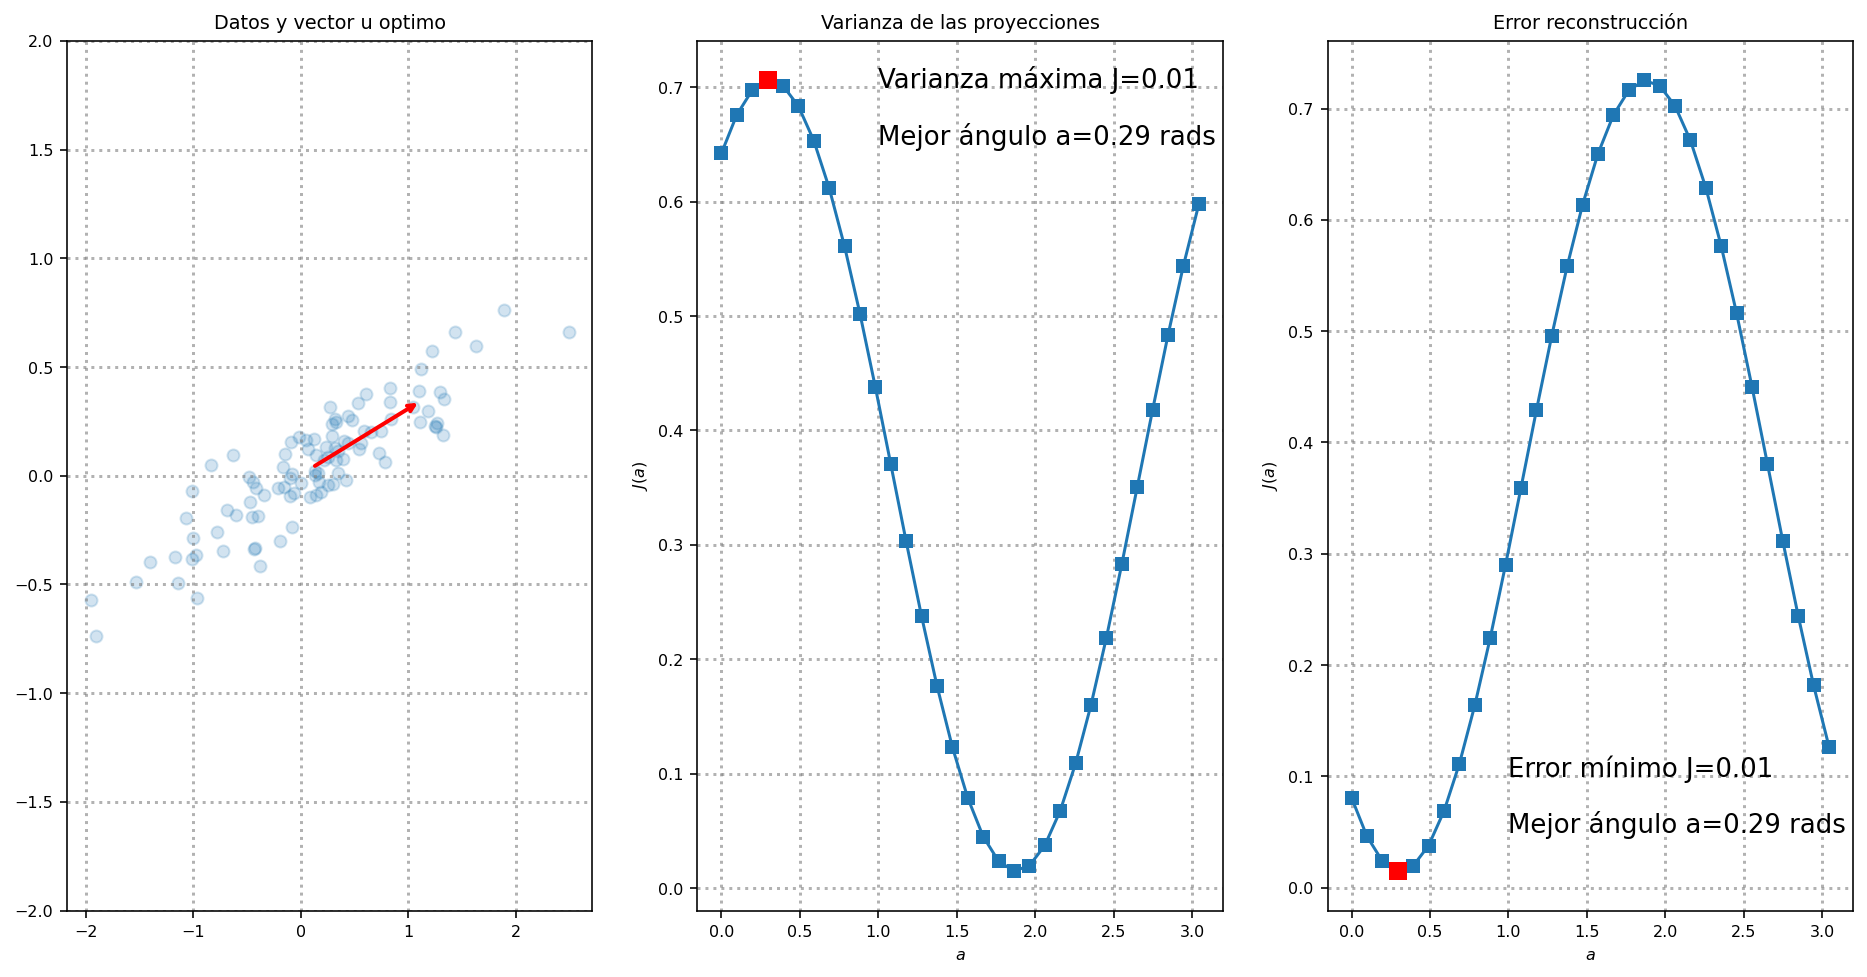

In [14]:
# Definimos todos los vectors u por si ángulo con respecto al eje x positivo
a_vector = np.arange(0,1,1./32)*np.pi

varianza = []

J = []

for i,a in enumerate(a_vector):
    u = np.array([np.cos(a),np.sin(a)]).reshape([-1,1]) # Pasamos a cartesianas
    
    Z = X @ u # Proyecciones sobre u de los datos X
    
    X_r = Z @ u.T 
    
    J.append(np.mean(np.linalg.norm(X-X_r,axis=1)**2))

    varianza.append(np.var(Z))
    
a_opt = a_vector[np.argmin(J)]
u_opt = np.array([np.cos(a_opt),np.sin(a_opt)]).reshape([-1,1])
    
fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))

ax_l.set_ylim([-1,1])
ax_l.scatter(X[:, 0], X[:, 1], alpha=0.2)
ax_l.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
draw_vector(np.mean(X,axis=0).reshape(2,1), np.mean(X,axis=0).reshape(2,1) + u_opt,ax_l)
ax_l.set_ylim(-2,2)
ax_l.set_title("Datos y vector u optimo")

ax_c.plot(a_vector,varianza,'-s')
ax_c.plot(a_opt,np.max(varianza),'rs',ms=8)
ax_c.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
ax_c.set_xlabel("$a$")
ax_c.set_ylabel("$J(a)$")
ax_c.set_title("Varianza de las proyecciones")
ax_c.text(1., 0.7, 'Varianza máxima J={0:.2f}'.format(np.min(J)), fontsize=13)
ax_c.text(1., 0.65, 'Mejor ángulo a={0:.2f} rads'.format(a_opt), fontsize=13)

ax_r.plot(a_vector,J,'-s')
ax_r.plot(a_opt,np.min(J),'rs',ms=8)
ax_r.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
ax_r.set_xlabel("$a$")
ax_r.set_ylabel("$J(a)$")
ax_r.set_title("Error reconstrucción")
ax_r.text(1., 0.1, 'Error mínimo J={0:.2f}'.format(np.min(J)), fontsize=13)
ax_r.text(1., 0.05, 'Mejor ángulo a={0:.2f} rads'.format(a_opt), fontsize=13)
    
plt.show()

Podemos comprobar cómo el **mínimo error de reconstrucción se consigue para el vector que induce la mayor varianza en el espacio proyectado**. Esto no es casualidad. En PCA la selección de la matriz $\bf U$ persigue maximizar la varianza proyectada, y se puede demostrar que esto minimiza el error de reconstrucción (como acabamos de comprobar experimentalmente).

## Problema que resolvemos en PCA
---

Con PCA, buscaremos la matriz $\bf U$ tal que maximizamos la **varianza** de los datos en el espacio proyectado. Mas concretamente, la solución de PCA se calcula del siguiente modo

- La componente principal 1, determinada por el vector $\mathbf{u}_1$, es aquella que maximiza la varianza de los datos proyectados sobre $\mathbf{u}_1$

$$ \max _{\mathbf{u}_1} \frac{1}{N} \sum_{n=1}^{N} (z_{n,1})^2 = \max _{\mathbf{u}_1} \frac{1}{N} \sum_{n=1}^{N} (\mathbf{x}^T_{n}\mathbf{u}_{1})^2$$


- La componente principal 2, determinada por el vector $\mathbf{u}_2$, es aquella dirección perpendicular a la componente 1 que maximiza la varianza proyectada

$$ \max _{\mathbf{u}_2} \frac{1}{N} \sum_{n=1}^{N} (\mathbf{x}^T_{n}\mathbf{u}_{2})^2 \text{ tal que } \mathbf{u}_1^T\mathbf{u}_2=0$$

- La componente principal 3, determinada por el vector $\mathbf{u}_3$, es aquella que es perpendicular a las componentes principales 1 y 2 y maximiza la varianza proyectada

$$ \max _{\mathbf{u}_3} \frac{1}{N} \sum_{n=1}^{N} (\mathbf{x}^T_{n}\mathbf{u}_{3})^2 \text{ tal que } \mathbf{u}_1^T\mathbf{u}_3=0 \text{ y } \mathbf{u}_2^T\mathbf{u}_3=0$$

- Así sucesivamente hasta encontrar las $K$ componentes principales.


## PCA sobre el ejemplo anterior


Vamos a utilizar la implementación de [PCA en sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) para determinar las componentes principales. 

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

Podemos acceder a los vectores $\mathbf{u}_1$ y $\mathbf{u}_2$ usando `pca.components_`, siendo una componente principal cada una de las filas de la matriz obtenida

In [16]:
print(pca.components_)

[[ 0.95257252  0.30431168]
 [-0.30431168  0.95257252]]


Vamos a calcular la varianza de los datos proyectados en cada una de las componentes principales ...

In [17]:
n_components = 2

proyecciones = pca.transform(X)  # Cálculo de las proyecciones

for n in range(n_components):
    
    print("Varianza de las proyecciones sobre la componente {0:d} : {1:.2f}".format(n,np.var(proyecciones[:,n])))

Varianza de las proyecciones sobre la componente 0 : 0.71
Varianza de las proyecciones sobre la componente 1 : 0.01


Estos mismos valores pueden obtenerse directamente del objeto PCA entrenado:

In [18]:
n_components = 2

for n in range(n_components):
    
    var = pca.explained_variance_[n]
    
    print("Varianza de las proyecciones sobre la componente {0:d} : {1:.2f}".format(n,var))
    
  

Varianza de las proyecciones sobre la componente 0 : 0.71
Varianza de las proyecciones sobre la componente 1 : 0.01


Finalmente, vamos a dibujar los vectores que definen las componentes principales sobre el dataset

In [ ]:
# Dibujar gráfica de los datos
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector 
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.show()

## Solución analítica de PCA

- Se puede demostrar que las componentes principales $\mathbf{u}_{1},\mathbf{u}_{2},\ldots,\mathbf{u}_{K}$ se corresponden con los $K$ **autovectores** con mayor **autovalor** $(\lambda_1,\ldots,\lambda_K)$ de la matriz de covarianza $C_{\mathbf{X},\mathbf{X}}$ de los datos. Si los datos tienen media nula, $C_{\mathbf{X},\mathbf{X}}$ se calcula como

$$C_{\mathbf{X},\mathbf{X}} = \frac{1}{N} \sum_{n=1}^N \mathbf{x}_{n}\mathbf{x}_{n}^T$$


- De hecho, la **varianza explicada en cada dimensión coincide con el autovalor correspondiente**. Por tanto, a mayor autovalor, más importancia tiene la componente correspondiente para explicar nuestros datos. La implementación de [PCA en sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), nos ordena la solución de PCA en orden decreciente de autovalores, con lo que la **primera componente es siempre la más importante**.


- Finalmente, se puede demostrar también que la solución PCA **minimiza** el error de reconstucción cuadrático medio


$$J = \frac{1}{N}\sum_{n=1}^{D} ||\mathbf{x}_n - \tilde{\mathbf{x}}_n||^2_2 =\frac{1}{N}\sum_{n=1}^{D} ||\mathbf{x}_n - \mathbf{U}\mathbf{z}_n^T||^2_2$$


## Un ejemplo con datos reales

Vamos a usar PCA para visualizar en 2 dimensiones un dataset ([cars93](https://www.tandfonline.com/doi/full/10.1080/10691898.1993.11910459)) que continene distintos atributos de 92 modelos distintos de coches, tales como cilindrada, consumo, precio, etc ...

In [26]:
car_data = pd.read_csv('Cars93.csv')
pd.set_option('max_columns', None)

car_data.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [27]:
# Nombre del coche juntando fabricante y modelo
car_data['Name'] = car_data['Manufacturer'] + car_data['Model']

# Vamos a usar un total de 7 variables
columns_use = ['Price','MPG.highway','MPG.city','Horsepower','Fuel.tank.capacity','Passengers','Weight','Length']

car_data_red = car_data[columns_use]

car_data_red.describe()

,Price,MPG.highway,MPG.city,Horsepower,Fuel.tank.capacity,Passengers,Weight,Length
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,19.509677,29.086022,22.365591,143.827957,16.664516,5.086022,3072.903226,183.204301
std,9.659430,5.331726,5.619812,52.374410,3.279370,1.038979,589.896510,14.602382
min,7.400000,20.000000,15.000000,55.000000,9.200000,2.000000,1695.000000,141.000000
25%,12.200000,26.000000,18.000000,103.000000,14.500000,4.000000,2620.000000,174.000000
50%,17.700000,28.000000,21.000000,140.000000,16.400000,5.000000,3040.000000,183.000000
75%,23.300000,31.000000,25.000000,170.000000,18.800000,6.000000,3525.000000,192.000000
max,61.900000,50.000000,46.000000,300.000000,27.000000,8.000000,4105.000000,219.000000


In [28]:
list_cars=list(car_data['Name'])

Data0 = np.array(car_data_red[car_data_red.columns])

# Normalizamos los datos

scaler = StandardScaler().fit(Data0)

Data = scaler.transform(Data0)

pca_cars = PCA(n_components=2)

pca_cars.fit(Data)

PCA(n_components=2)

In [29]:
# Proyectamos los datos en las dos componentes principales

Data2d = pca_cars.transform(Data)

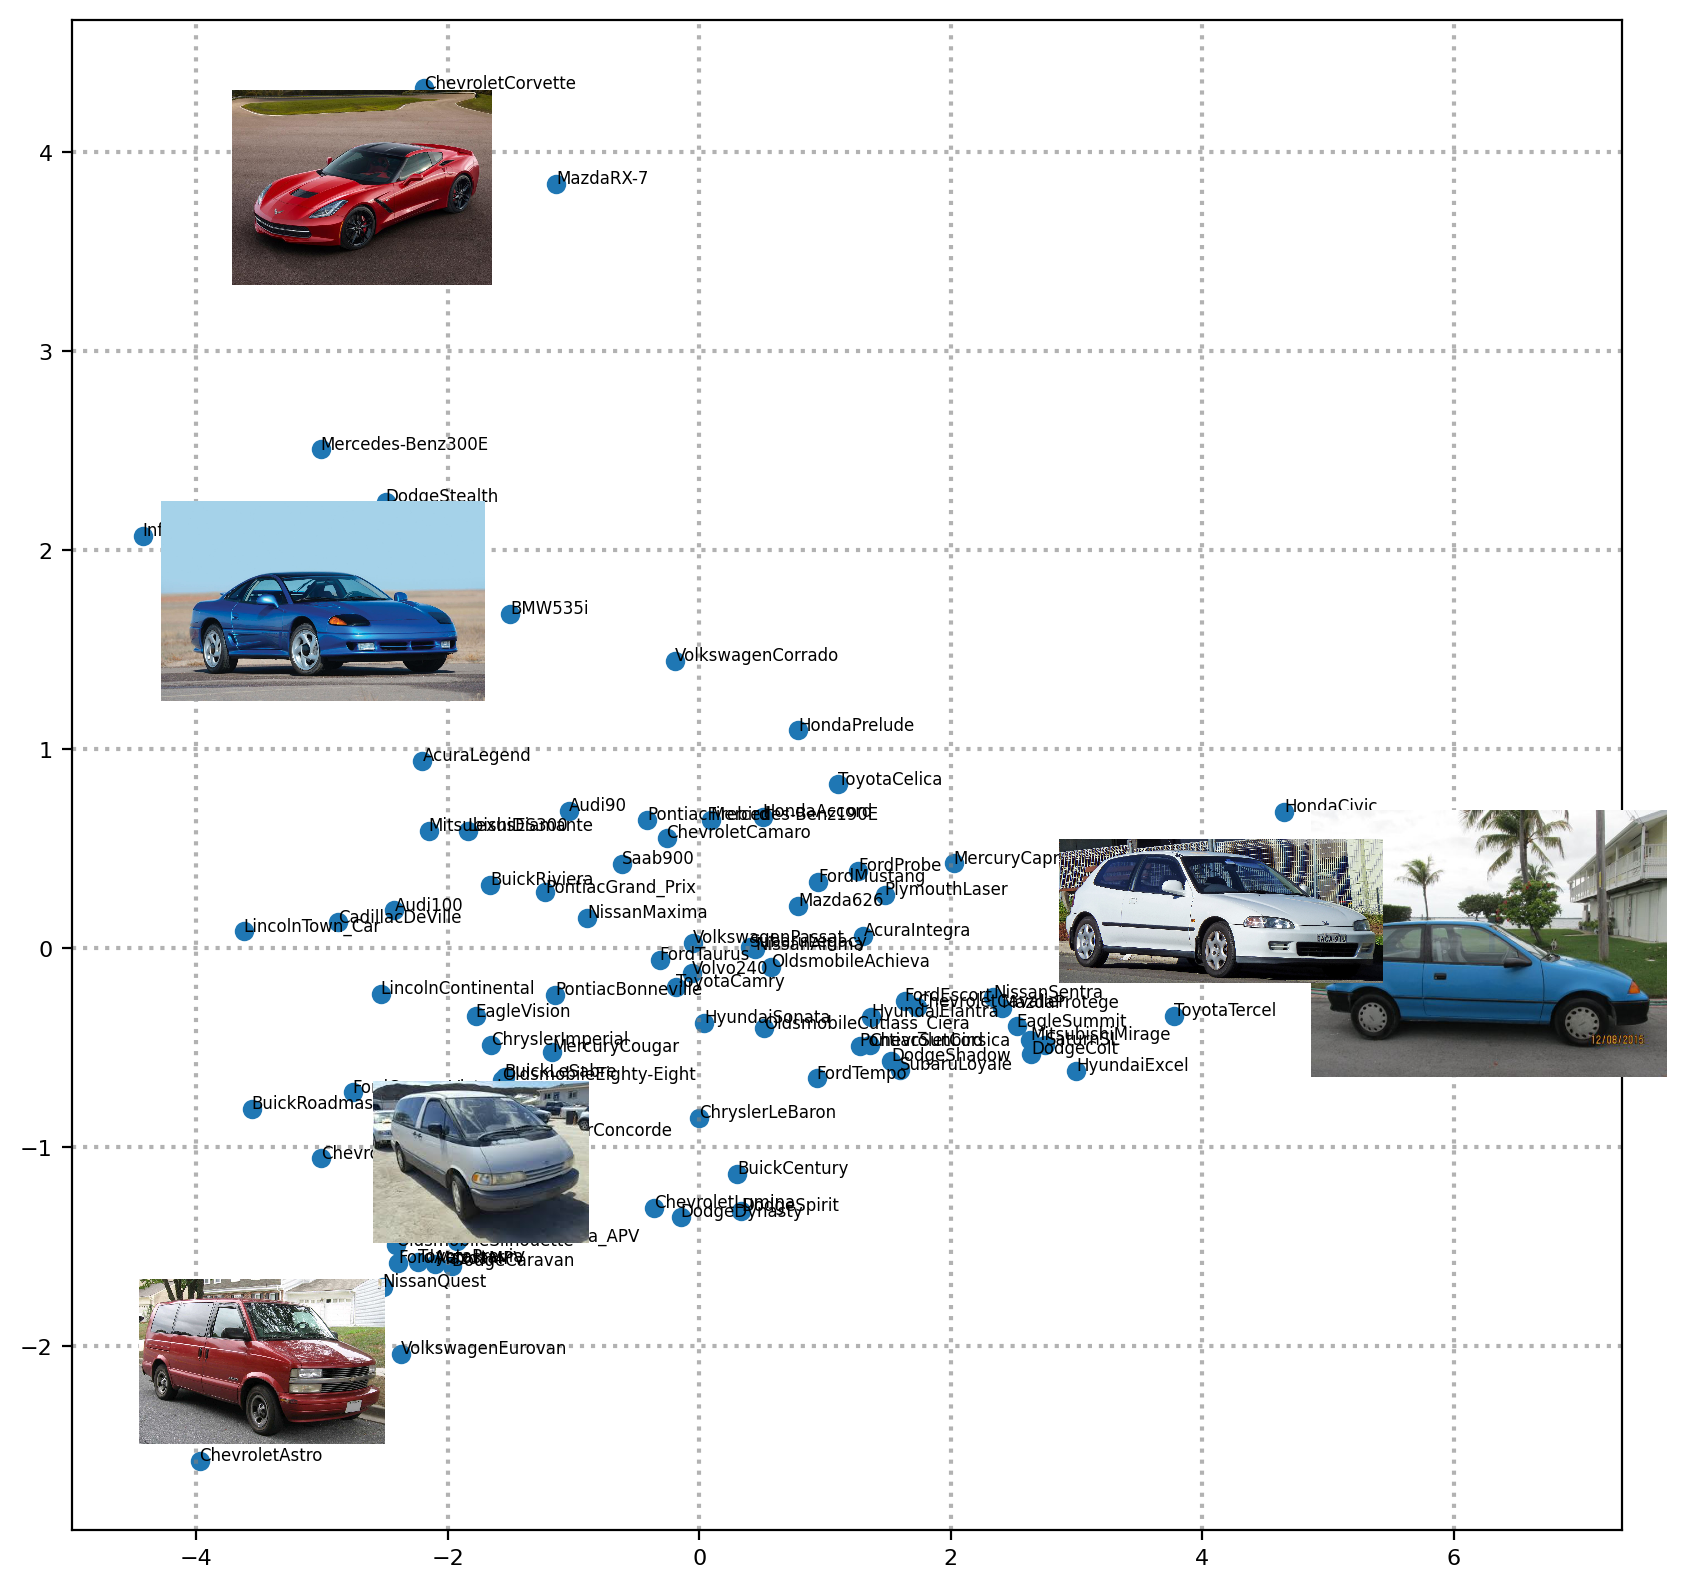

In [33]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from skimage import io

fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
n_cars = -1
ax.scatter(Data2d[:n_cars,0], Data2d[:n_cars,1]) 
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)

for i,car in enumerate(list_cars[:n_cars]):
    plt.annotate(car,(Data2d[i,0], Data2d[i,1]),fontsize=6)

    
cars = ['ChevroletCorvette','DodgeStealth','GeoMetro','HondaCivic','ChevroletAstro','ToyotaPrevia']
cars_index = [list_cars.index(nombre) for nombre in cars]
zoom_image = [0.1,0.07,0.2,0.03,0.05,0.3]
offset_image = [-0.5,-0.5,-0.5,-0.5,0.5,0.5]

for i,car in enumerate(cars):
    
    fig_name = car + '.jpg'
    
    image = io.imread(fig_name)

    im = OffsetImage(image, zoom=zoom_image[i])
    ab = AnnotationBbox(im, Data2d[cars_index[i],:]+offset_image[i], xycoords='data', frameon=False)
    ax.add_artist(ab)



En el gráfico anterior, podemos comprobar como de forma no supervisada, en la proyección que PCA encuentra en solo dos dimensiones hay grupos diferenciados que tienen consistencia, tales como caravanas y furgonetas (Chevrolet Astro, Volkswagen Eurovan, Mazda MPV, ...),  coches compactos (Honda Civic, Ford Fiesta, Geo Metro...) o deportivos (Chevrolet Corvette, Mazda RX7). En este sentido, PCA permite una visualización cualitativa de los datos que puede ser útil en muchos problemas.

## ¿Cuántas componentes son suficientes para representar nuestros datos?

En el ejemplo anterior hemos tomado $K=2$ para poder visualizar la proyección de PCA. Una opción habitual para escoger el número de componentes es utilizar la fracción de la **varianza explicada** 

$$F(K) = \frac{\sum_{j=1}^{K}\lambda_j}{\sum_{j=1}^{K_{max}} \lambda_j}$$

donde el denominador (suma de todos los autovalores de la matriz de covarianza) se denomina **varianza total** y el numerador corresponde la varianza explicada por las $K$ componentes principales. Una opción usual es buscar $K$ de tal manera que $F(K)$ se sitúe en el $90\%$ o $95\%$.

Vamos a dibujar $F(K)$ para el dataset anterior.

Text(0, 0.5, 'F(K)')

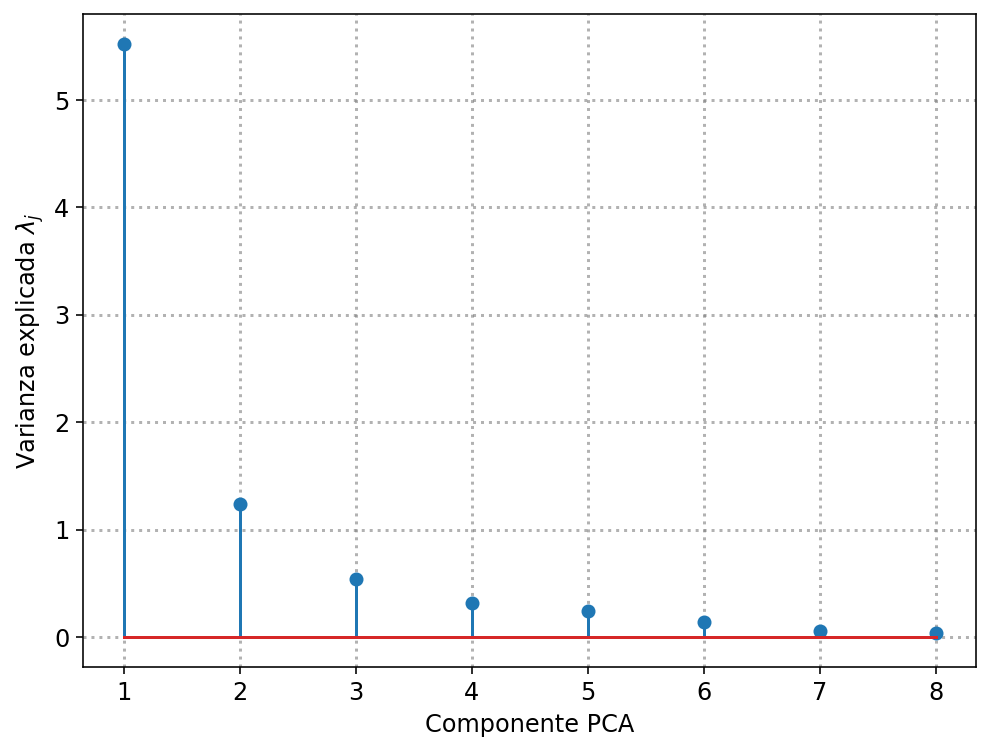

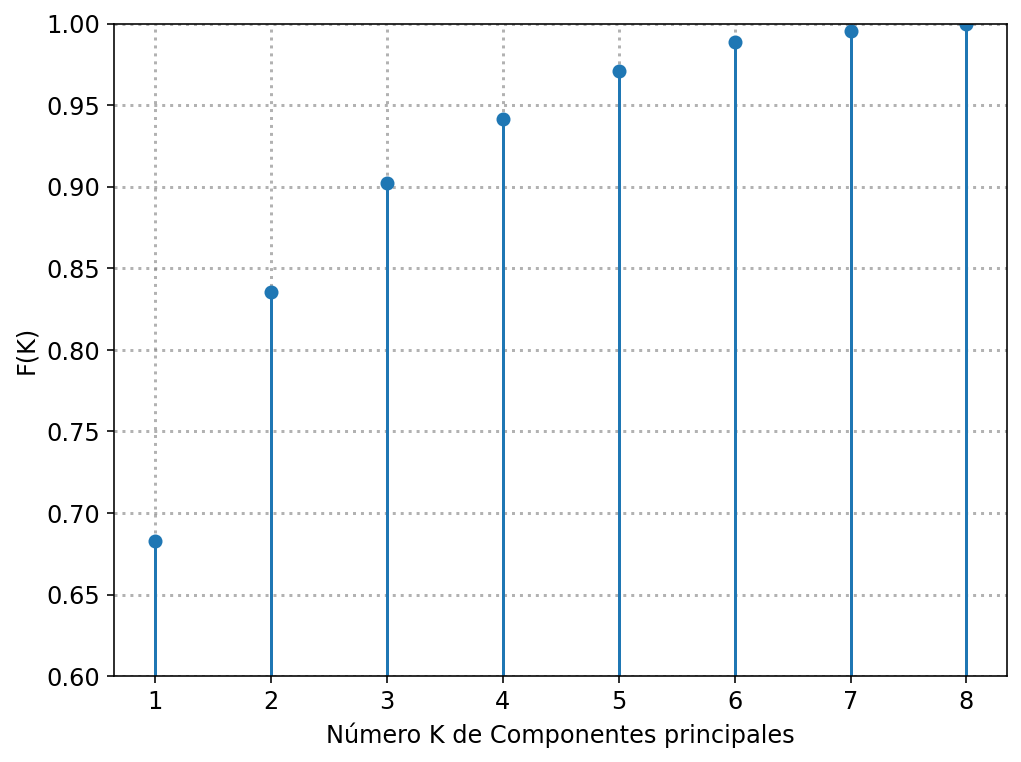

In [34]:
plt.rcParams.update({'font.size': 12})

pca_cars_full = PCA(n_components=Data0.shape[1]) # Dimensión de X menos 1, máximo que podemos escoger

pca_cars_full.fit(Data)

plt.stem(np.arange(1,Data0.shape[1]+1,1),pca_cars_full.explained_variance_)
plt.xlabel('Componente PCA')
plt.ylabel('Varianza explicada $\lambda_j$')
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)

# Calculamos F(K)
plt.figure()
F_K = [np.sum(pca_cars_full.explained_variance_[:l])/np.sum(pca_cars_full.explained_variance_) for l in range(1,Data0.shape[1]+1)]
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)

plt.stem(range(1,Data0.shape[1]+1),F_K)
plt.ylim([0.6,1.0])
plt.xlabel('Número K de Componentes principales')
plt.ylabel('F(K)')


Podemos ver que que con 3 componentes $F(K)$ está ya por encima del $90\%$. 

## Extracción de características PCA

Otro de los usos más comunes con PCA es la reducción de dimensionalidad de los datos a la entrada de un regressor o un clasificador. Esto nos puede permitir combatir el sobre ajuste debido a la alta dimensionalidad de los datos. 

Usando de nuevo la base de datos Spam, vamos a generar un ejemplo con muy pocos datos en el que un clasificador que trabaje sobre los datos originales va a sobreajustar. Utilizando PCA, reduciremos la dimensionalidad de los datos y mejoraremos nuestro clasificador en el conjunto de test.

In [35]:
data = load_spam()
X0_spam = data[data.columns[:57]].values
Y_spam = data['target'].values

print("Cargadas {0:d} observaciones con {1:d} columnas\n".format(len(data), len(data.columns)))
print("Ejemplos")
data.head()


Cargadas 4601 observaciones con 58 columnas

Ejemplos


,wf_make,wf_address,wf_all,wf_3d,wf_our,wf_over,wf_remove,wf_internet,wf_order,wf_mail,wf_receive,wf_will,wf_people,wf_report,wf_addresses,wf_free,wf_business,wf_email,wf_you,wf_credit,wf_your,wf_font,wf_000,wf_money,wf_hp,wf_hpl,wf_george,wf_650,wf_lab,wf_labs,wf_telnet,wf_857,wf_data,wf_415,wf_85,wf_technology,wf_1999,wf_parts,wf_pm,wf_direct,wf_cs,wf_meeting,wf_original,wf_project,wf_re,wf_edu,wf_table,wf_conference,cf_;,cf_(,cf_[,cf_!,cf_$,cf_#,cap_average,cap_longest,cap_total,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [42]:
# Dividimos train/test. Normalizamos
X0_spam_train, X0_spam_test, Y_spam_train, Y_spam_test = train_test_split(X0_spam, Y_spam, test_size=0.3, random_state=42)

transformer_spam = StandardScaler().fit(X0_spam_train)  # X0--> Datos originales, X --> Normalizados
X_spam_train = transformer_spam.transform(X0_spam_train)
X_spam_test = transformer_spam.transform(X0_spam_test)
print(X_spam_train.shape, Y_spam_train[:, np.newaxis].shape) #<-- solo pa ver las dimensiones de mis datos y utilizar el np.newaxis

(3220, 57) (3220, 1)


Vamos a reducir el conjunto de entrenamiento a sólo **100 datos**

In [43]:
X_spam_train = X_spam_train[:100,:]
Y_spam_train = Y_spam_train[:100]

Y ahora entrenamos un k-NN sobre estos 100 datos de dimensión 58 ...

In [44]:
from sklearn import neighbors
# Entrenamiento k-NN con validación de vecinos

K_max = 15
rango_K = np.arange(1, K_max+1)
nfold = 10

# Define un diccionario con el nombre de los parámetros a explorar como claves y el rango como valores
diccionario_parametros = [{'n_neighbors': rango_K,'weights':['uniform','distance']}]

# Validación cruzada con GridSearchCV
knn_spam = GridSearchCV(estimator=neighbors.KNeighborsClassifier( ), param_grid=diccionario_parametros,cv=nfold)
# Entrenamiento
knn_spam.fit(X_spam_train,Y_spam_train)
# Test
accuracy_train_knn = knn_spam.score(X_spam_train,Y_spam_train)
accuracy_test_knn = knn_spam.score(X_spam_test,Y_spam_test)

print("El número de vecinos seleccionado es k={0:d}".format(knn_spam.best_params_['n_neighbors']))
print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train_knn*100, accuracy_test_knn*100))

El número de vecinos seleccionado es k=5
Accuracy train 87.00%. Accuracy test 81.10%



Podemos comprobar cómo en el conjunto de test el rendimiento del clasificador empeora. Para reducir el impacto del sobreajuste, vamos a utilizar PCA para reducir la dimensionalidad de los datos a la entrada del clasificador. Utilizando `Pipeline` y `GridSearchCV` validaremos el número de componentes de PCA.

In [140]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('PCA', PCA()),
                 ('kNN', neighbors.KNeighborsClassifier( ))])

param_grid = {
    'PCA__n_components': np.arange(1,20,1),
    'kNN__n_neighbors': np.arange(1,K_max+1),
    'kNN__weights':['uniform','distance'],
}

grid_knn = GridSearchCV(pipe, param_grid, cv=3)
grid_knn.fit(X_spam_train, Y_spam_train)

# Test
accuracy_train_knn = grid_knn.score(X_spam_train,Y_spam_train)
accuracy_test_knn = grid_knn.score(X_spam_test,Y_spam_test)

print("El número de componentes de PCA es {0:d}".format(grid_knn.best_estimator_['PCA'].n_components))
print("El número de vecinos seleccionado es k={0:d}".format(grid_knn.best_estimator_['kNN'].n_neighbors))
print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train_knn*100, accuracy_test_knn*100))

El número de componentes de PCA es 4
El número de vecinos seleccionado es k=15
Accuracy train 100.00%. Accuracy test 86.17%



Observad que con sólo **4 componentes** hemos conseguido mejorar la fracción de etiquetas correctas en el test set al 86\%.

Es importante notar que la selección del número de componentes no sigue el criterio de conseguir explicar el 90\% de la varianza total. De hecho si dibujamos $F(K)$ en este caso podemos comprobar que para $K=4$, $F(K)$ está por debajo del 40%. Sin embargo, esta representación de baja dimensión permite generalizar mejor a los datos de test.

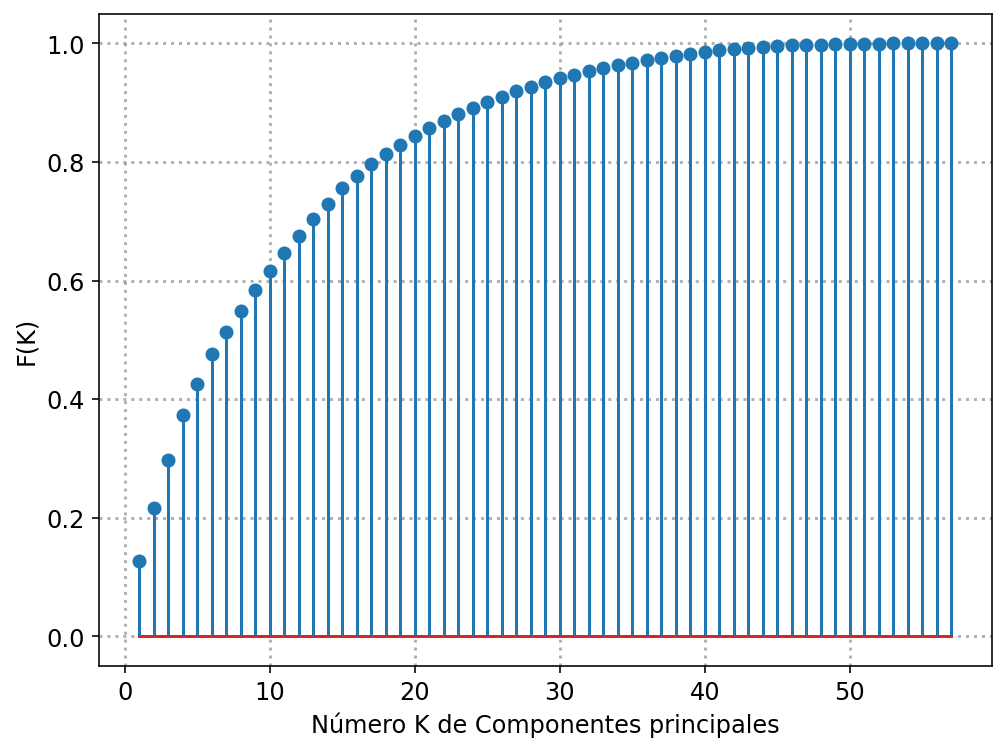

In [46]:
pca_spam_full = PCA(n_components=X_spam_train.shape[1]).fit(X_spam_train)


# Calculamos F(K)
F_K = [np.sum(pca_spam_full.explained_variance_[:l])/np.sum(pca_spam_full.explained_variance_) for l in range(1,X_spam_train.shape[1]+1)]

plt.stem(range(1,X_spam_train.shape[1]+1),F_K)
plt.xlabel('Número K de Componentes principales')
plt.ylabel('F(K)')
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)

### Ejercicio

> **Ejercicio:**  Determinar el porcentaje de etiquetas correctamente clasificadas en train y test si usamos un número de componentes PCA que explique el 93% de la varianza total.

In [133]:
valor_k_93 = [i  for i, valor in enumerate(F_K) if 
              (valor >= 0.93 and valor <= 0.94)] #<--- filtrar por la condicion, creo una lista necearia
                                                 #     para el GridSearchCV
pca_spam_k_93 = PCA(n_components=valor_k_93[0])  #<--aquí meteriamos la descomposición

In [139]:
#Defino los parámetros que voy a usar
pipe = Pipeline([('PCA', PCA()), ('kNN', neighbors.KNeighborsClassifier( ))])
K_max = X_spam_train.shape[1]
rango_PCA = np.arange(2, n_components+1, 4)
rango_K = np.arange(1, K_max+1)
nfold = 10
diccionario_parametros = {'PCA__n_components': rango_PCA,'kNN__n_neighbors': rango_K}

#Validación cruzada y entrenamiento KNN
knn_spam_93 = GridSearchCV(estimator=pipe, param_grid=diccionario_parametros,cv=nfold)
knn_spam_93.fit(X_spam_train,Y_spam_train)

#El porcentaje de etiquetas acertadas en train test
accuracy_train_knn_93 = knn_spam_93.score(X_spam_train,Y_spam_train)
accuracy_test_knn_93 = knn_spam_93.score(X_spam_test,Y_spam_test)

print("El número de vecinos seleccionado es k={0:d}".format(knn_spam_93.best_params_['kNN__n_neighbors']))
print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train_knn_93*100, accuracy_test_knn_93*100))

El número de vecinos seleccionado es k=1
Accuracy train 100.00%. Accuracy test 83.35%



<a id='kmeans'></a>

# Parte II: Agrupación de datos (clustering) con k-means
---

El algoritmo k-means es un algoritmo particularmente sencillo que nos permite encontrar grupos (clusters) sobre un conjunto de datos de forma **no supervisada**. Estos grupos pueden ser útiles para entender la estructura de nuestros datos, imputar valores perdidos en nuestros datos, realizar etiquetado de forma más eficiente, detección de outliers, o para encontrar grupos de datos similares (*information retrieval*).





## Algoritmo K-means
---

Dado un dataset de $\{\mathbf{x}_n\}_{n=1}^N$, una métrica de **distancia** entre cualquier par de puntos $d(\mathbf{x},\mathbf{x}')$ y un número $K$ prefijado de grupos, K-means implementa el siguiente algoritmo iterativo para asignar cada dato a una de los $K$ posibles grupos:

**Inicialización**. Cada grupo $k$, $k=1,\ldots,K$, se caracteriza por un *centroide* que $\mathbf{c}_k$ que inicializa (en la versión de k-means más sencilla) escogiendo aleatoriamente un punto de nuestro dataset. 

Hasta **convergencia** se repiten los siguientes pasos:

- **Paso I: asignación**. Para $n=1,\ldots,N$, el dato $\mathbf{x}_n$ se asigna al grupo cuyo centroide esté más cerca de acuerdo a la métrica de distancia. Esto es, si $A(\mathbf{x}_n)\in\{1,\ldots,K\}$ representa el grupo asignado al dato $\mathbf{x}_n$ entonces

\begin{align}
A(\mathbf{x}_n) = \arg \min_{\{1,\ldots,K\}} d(\mathbf{x}_n,\mathbf{c}_k)
\end{align}

- **Paso II: actualizar centroides**. Dadas las asignaciones de los datos a los grupos, recalculamos el centroide como la media aritmética de los puntos asignados a  cada una de ellas. Para $k=1,\ldots,K$,

\begin{align}
\mathbf{c}_k = \frac{1}{N_k} \sum_{n: A(\mathbf{x}_n)= k} \mathbf{x}^{(n)},
\end{align}
$~~~~~~$ donde $\frac{1}{N_k}$ es el número de puntos asignados al grupo $k$.

Si no hay cambios en la asignación de puntos a grupos entre dos iteraciones consecutivas, el algoritmo ha convergido. En caso contrario, volvemos al paso 2.


<img src='http://www.tsc.uc3m.es/~olmos/BBVA/k-mean_good.jpg' width=1000 />



## Un ejemplo sintético en dos dimensiones
---

Como es habitual, vamos a mostrar el uso de la librería [KMeans de Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) y su solución con un ejemplo sintético en dos dimensiones.



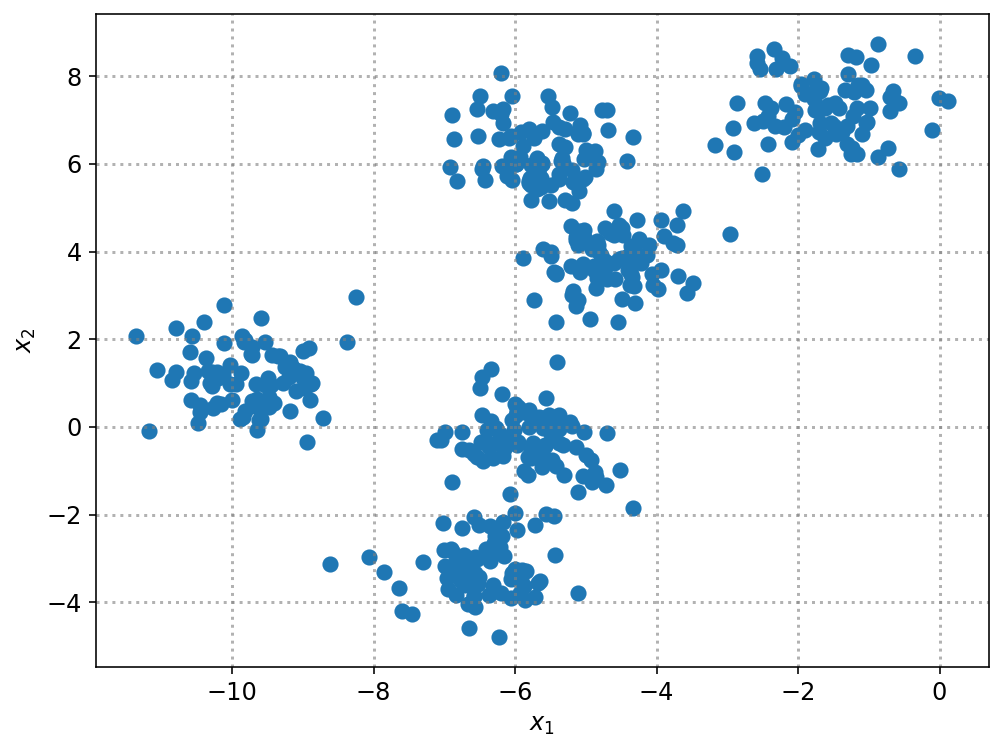

In [141]:
from sklearn.datasets import make_blobs

rng = np.random.RandomState(36)

X, y_true = make_blobs(n_samples=500, centers=6,
                       cluster_std=0.6, random_state=22)

plt.scatter(X[:, 0], X[:, 1], s=50)
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()


In [142]:
from sklearn.cluster import KMeans

# K-means con K=4. Luego hablamos sobre la selección de K
K=4

kmeans = KMeans(n_clusters=K) # Definimos objeto con parámetros por defecto
kmeans.fit(X) # Entrenamos k-means
y_kmeans = kmeans.predict(X) # Obtenemos el identificador del grupo para cada dato
centers = kmeans.cluster_centers_ # <-- Centros de gravedad definidos

In [143]:
y_kmeans

array([3, 3, 1, 3, 1, 0, 1, 2, 1, 3, 3, 3, 2, 2, 3, 3, 1, 1, 2, 3, 3, 1,
       2, 0, 3, 2, 1, 1, 3, 3, 1, 3, 3, 0, 1, 1, 0, 1, 3, 1, 0, 3, 1, 0,
       0, 3, 3, 1, 0, 2, 0, 1, 0, 3, 0, 0, 2, 0, 1, 3, 0, 0, 3, 2, 0, 3,
       1, 3, 3, 0, 2, 2, 0, 1, 0, 3, 3, 2, 3, 2, 0, 1, 1, 3, 3, 3, 3, 3,
       1, 0, 3, 2, 1, 3, 1, 3, 2, 1, 3, 3, 1, 0, 0, 3, 1, 1, 1, 1, 1, 0,
       2, 3, 3, 1, 3, 1, 2, 1, 1, 1, 1, 2, 3, 2, 2, 1, 3, 3, 1, 1, 3, 1,
       3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 2, 1, 3,
       3, 3, 3, 1, 2, 2, 1, 2, 2, 2, 0, 1, 2, 0, 3, 1, 1, 3, 1, 2, 0, 1,
       0, 3, 1, 1, 2, 0, 3, 3, 0, 3, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3, 0, 1,
       3, 1, 2, 0, 3, 3, 0, 1, 3, 3, 0, 1, 1, 3, 3, 3, 3, 1, 2, 0, 3, 1,
       1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 0, 0, 1, 2, 0, 2, 3, 1, 1, 3, 3, 3,
       2, 0, 1, 2, 1, 1, 3, 3, 1, 3, 3, 3, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 3, 1, 3, 3, 1, 2, 3, 1, 0, 3, 0, 1, 1, 3, 1, 3, 3,
       1, 3, 1, 3, 3, 1, 0, 3, 3, 2, 2, 1, 1, 0, 1,

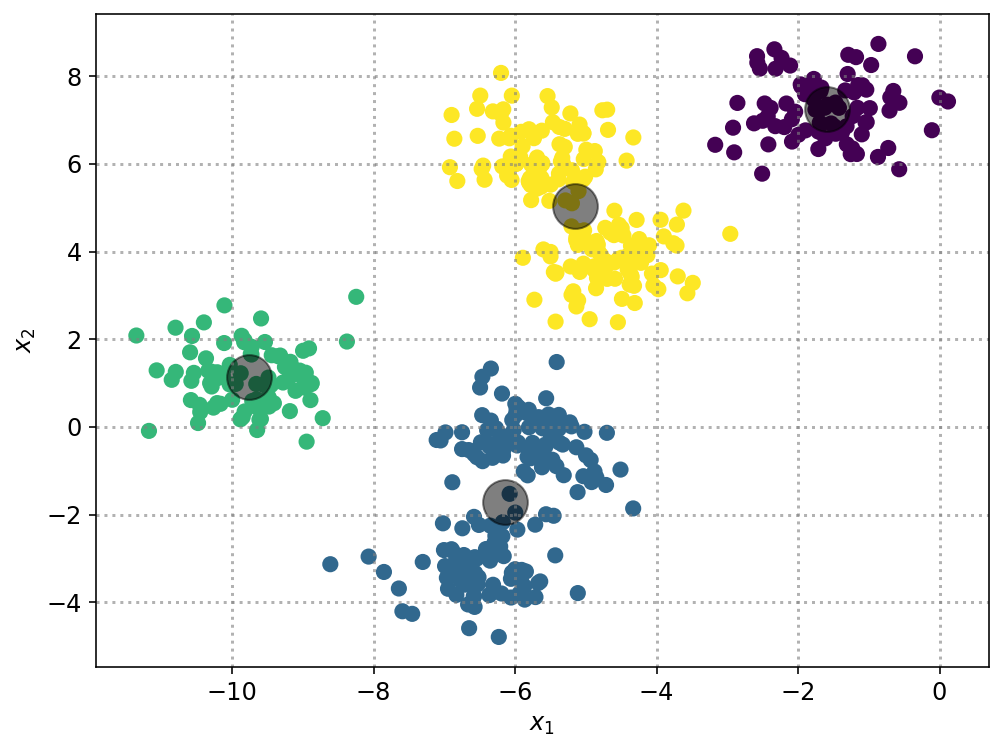

In [144]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5)

plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

## Sensibilidad con la inicialización
---

En la práctica, el algoritmo k-means es muy rápido (uno de los algoritmos de agrupamiento más rápidos disponibles), pero su solución no es única (hay muchos mínimos locales). Por eso puede ser útil reiniciarlo varias veces.

Vamos a comprobar en el ejemplo anterior las soluciones con distintas inicializaciones. En las siguientes figuras, mostramos la **inicialización de cada centroide con un triángulo rojo**.


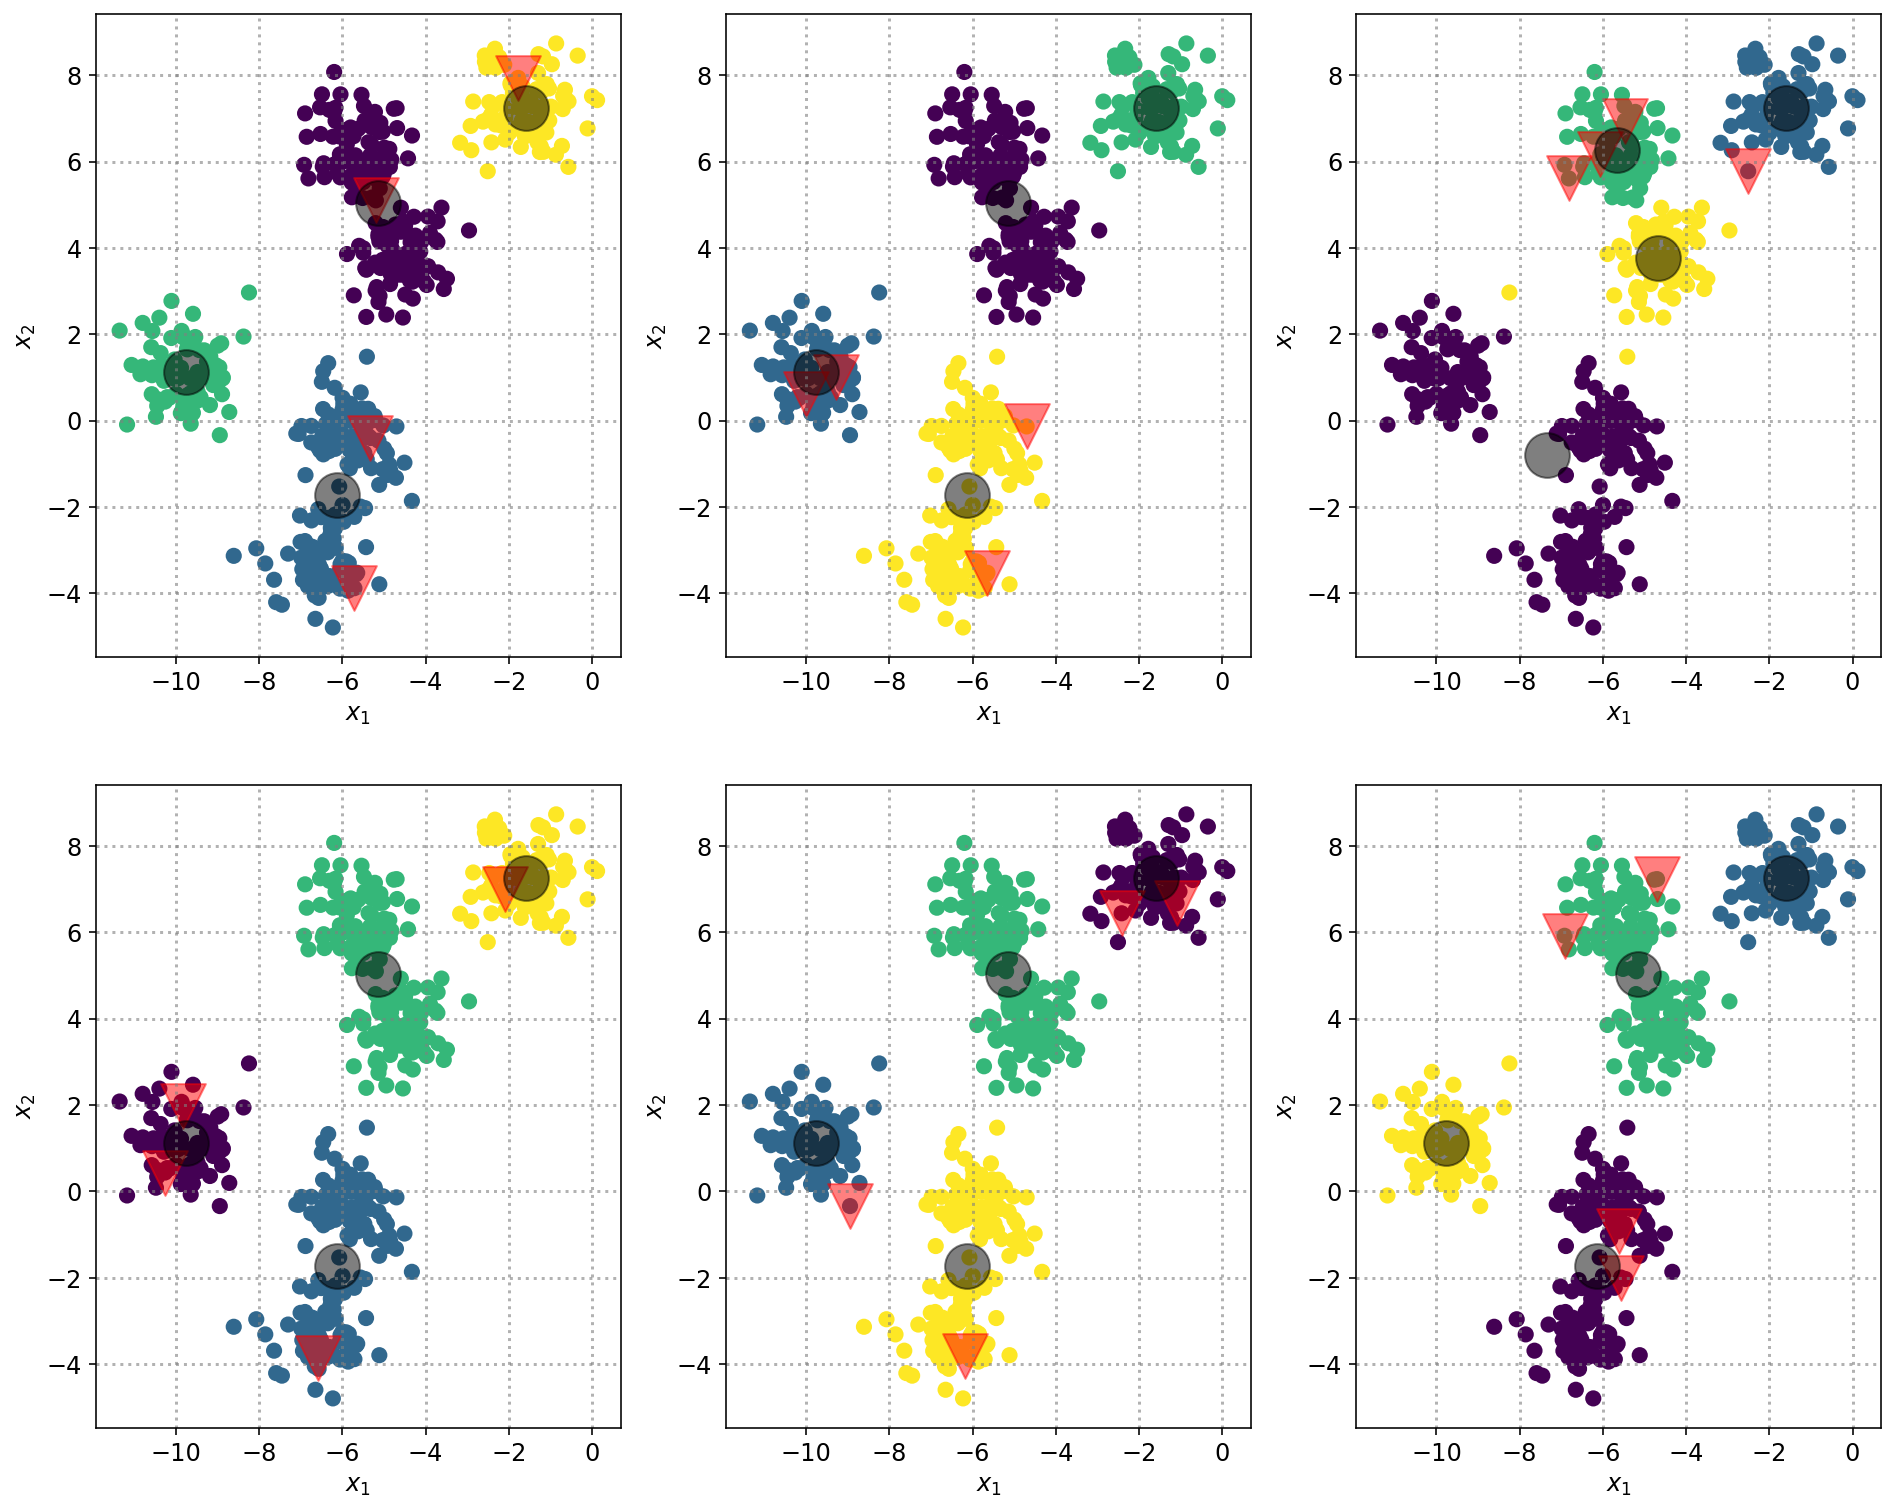

In [145]:
n_plots_row = 3
n_rows = 2
rs = 45

fig, ax = plt.subplots(nrows=n_rows, ncols=n_plots_row, figsize=(16, 13))

for r in range(n_rows):
    for c in range(n_plots_row):
        
        # Inicialización aleatoria en el dataset
        centers_idx = np.random.permutation(X.shape[0])[:4]
        init_centroids = X[centers_idx,:]
        kmeans = KMeans(n_clusters=K,init=init_centroids,random_state=rs) 
        kmeans.fit(X) # Entrenamos k-means
        y_kmeans = kmeans.predict(X) # Obtenemos el identificador del grupo para cada dato
        
        centers = kmeans.cluster_centers_
        
        ax[r,c].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
        ax[r,c].scatter(init_centroids[:,0], init_centroids[:, 1], c='red', s=500, alpha=0.5,
                        marker="v",label='Inicialización')
        ax[r,c].scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5,label='Centroide k-means')
        ax[r,c].grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)

        ax[r,c].set_xlabel('$x_1$')
        ax[r,c].set_ylabel('$x_2$')


¿Cómo escoger qué solución de K-means es la más adecuada? Podemos nombrar dos opciones básicas.

1. Si buscamos grupos **interpretables** (por ejemplo agrupar clientes de un determinado servicio bancario), tendremos que mirar con atención los grupos y decidir qué solución de K-means se ajusta de forma más coherente a  los datos y el problema en cuestión. Típicamente, esto lo haría un experto en el problema en sí (no tanto una persona que únicamente sepa de aprendizaje automático).


2. Podemos utilizar la **función de coste de K-means** u otros coeficientes que midan la **consistencia de los grupos encontrados**.




## Función de coste en K-means
---

El algoritmo iterativo de $K$-means que hemos presentado anteriormente es una forma de encontrar la solución al siguiente problema

\begin{align}
\min_{\mathbf{c}_1,\ldots,\mathbf{c}_K} \mathcal{L}(\mathbf{c}_1,\ldots,\mathbf{c}_K) = \min_{\mathbf{c}_1,\ldots,\mathbf{c}_K} \frac{1}{N} \sum_{k=1}^K \sum_{i: A(\mathbf{x}^{(i)})= k} d(\mathbf{x}^{(i)},\mathbf{c}_k)
\end{align}

donde fijaos que la función de coste $\mathcal{L}(\mathbf{c}_1,\ldots,\mathbf{c}_K)$ es la **distancia promedio de cada punto a su correspondiente centroide**. En K-means, pretendemos minimizar esta cantidad. Sin embargo, como hemos comentado esta función de coste tiene en general varios mínimos locales.

Una opción para escoger la solución de K-means es buscar aquella que minimiza $\mathcal{L}(\mathbf{c}_1,\ldots,\mathbf{c}_K)$ tras repetir el algoritmo un cierto número de veces. En [K-means con sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) accedemos al valor de $\mathcal{L}(\mathbf{c}_1,\ldots,\mathbf{c}_K)$ con el atributo `inertia_` si lo dividimos por el número de datos.


Estudiemos el valor de $L$ en el caso anterior.

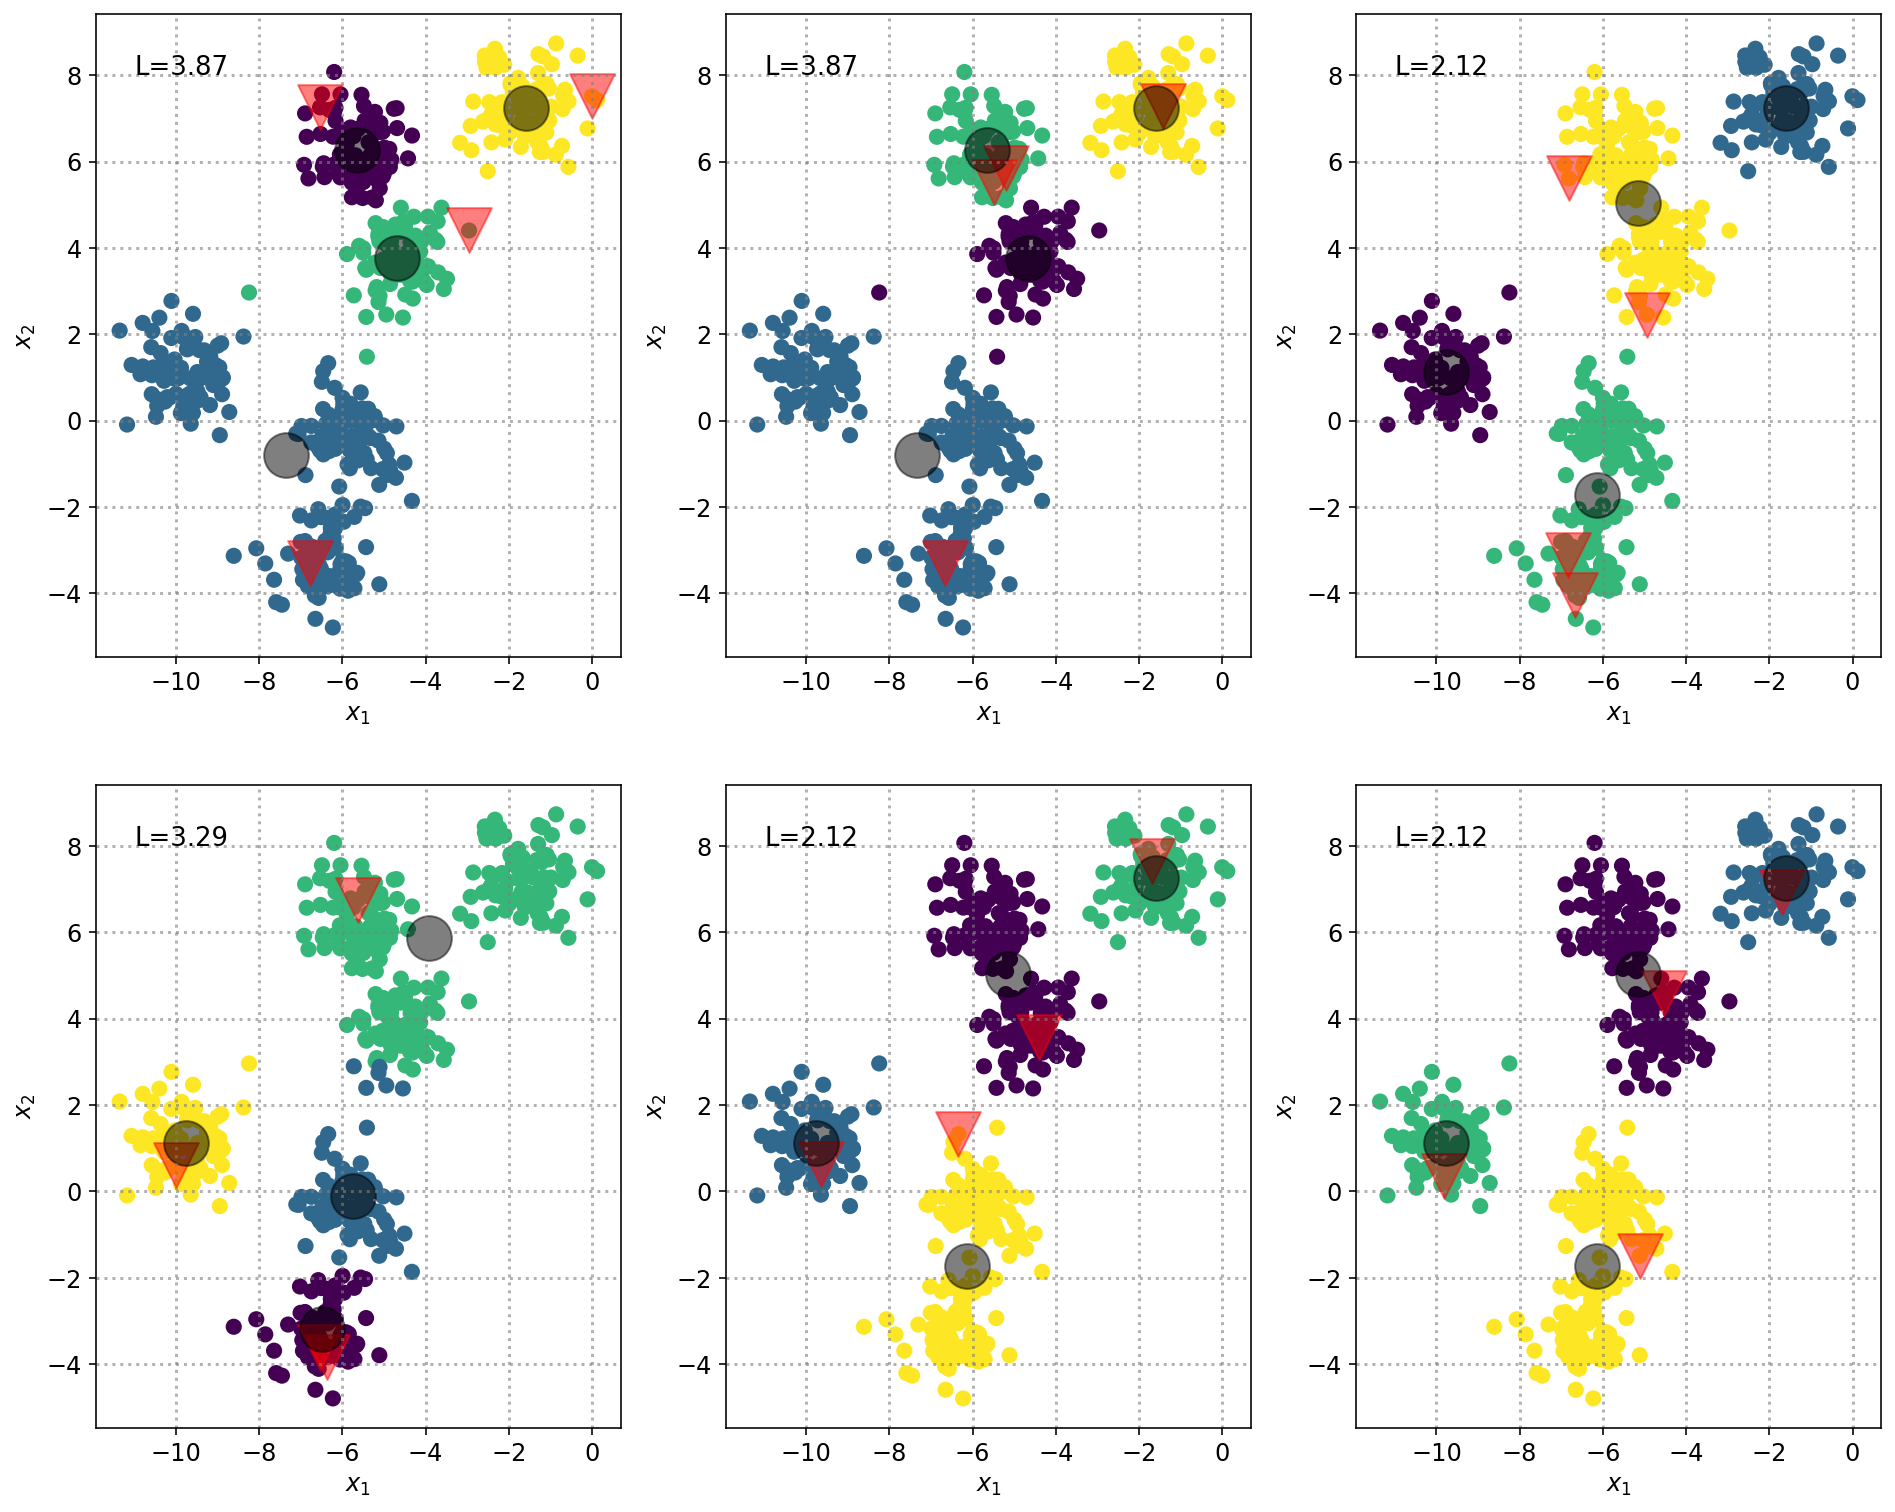

In [146]:
n_plots_row = 3
n_rows = 2
rs = 45

fig, ax = plt.subplots(nrows=n_rows, ncols=n_plots_row, figsize=(16, 13))

for r in range(n_rows):
    for c in range(n_plots_row):
        
        # Inicialización aleatoria en el dataset
        centers_idx = np.random.permutation(X.shape[0])[:4]
        init_centroids = X[centers_idx,:]
        kmeans = KMeans(n_clusters=K,init=init_centroids,random_state=rs) 
        kmeans.fit(X) # Entrenamos k-means
        y_kmeans = kmeans.predict(X) # Obtenemos el identificador del grupo para cada dato
        
        centers = kmeans.cluster_centers_
        
        ax[r,c].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
        ax[r,c].scatter(init_centroids[:,0], init_centroids[:, 1], c='red', s=500, alpha=0.5,
                        marker="v",label='Inicialización')
        ax[r,c].scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5,label='Centroide k-means')
        ax[r,c].grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
        ax[r,c].text(-11, 8, 'L={0:.2f}'.format(kmeans.inertia_/X.shape[0]), fontsize=13) #<-- función de coste
        ax[r,c].set_xlabel('$x_1$')
        ax[r,c].set_ylabel('$x_2$')

Esta selección de la mejor solución de K-means la podemos implementar directamente en Sklearn con el **parámetro de entrada** `n_init`

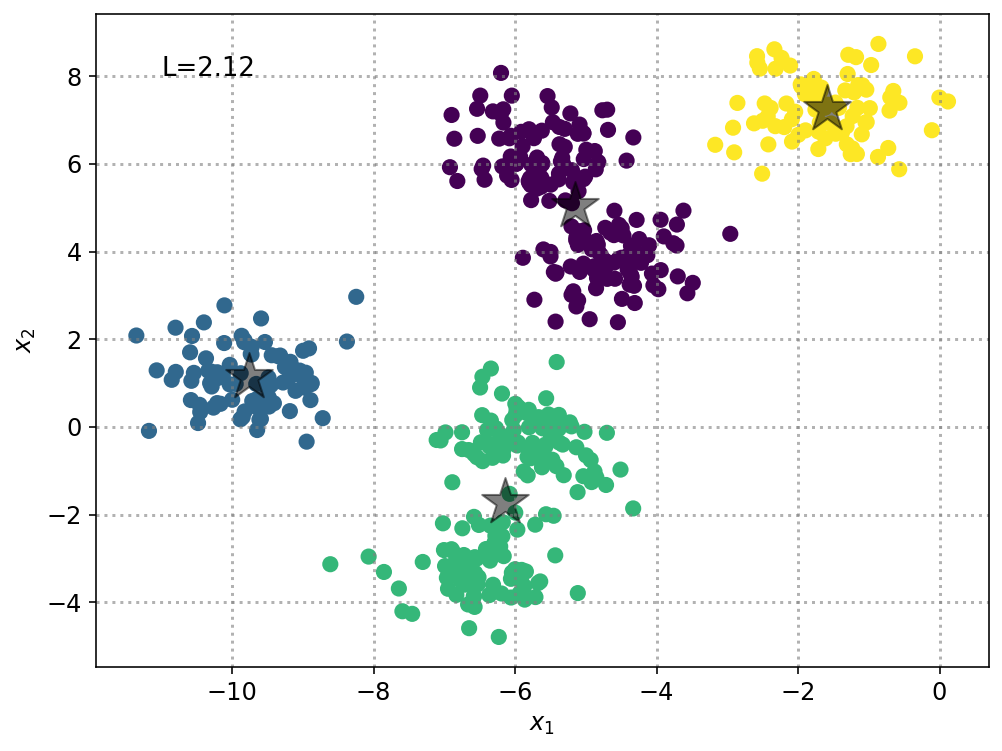

In [162]:
# K-means con K=4. Luego hablamos sobre la selección de K
K=4

kmeans = KMeans(n_clusters=K,n_init=10) # Definimos objeto con parámetros por defecto, n_init es el número de veces que se ejecuta el algoritmo
                                        # k-Means, con semillas de centroide diferentes. El resultado final es el mejor resultado de n_init 
                                        # ejecuciones consecutivas en términos de inercia
kmeans.fit(X) # Entrenamos k-means
y_kmeans = kmeans.predict(X) # Obtenemos el identificador del grupo para cada dato
centers = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='*', s=600, alpha=0.5)

plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.text(-11, 8, 'L={0:.2f}'.format(kmeans.inertia_/X.shape[0]), fontsize=13)
plt.show()

## Selección del número $K$ de grupos
---

La elección del número $K$ de grupos puede hacerse con consideraciones similares. 

- Si buscamos interpretabilidad de los grupos, exploraremos la solución para $K=1,2,3, ...$ hasta encontrar qué caso separa los datos de forma interpretable para un experto.

- De nuevo, podemos usar la función de coste $\mathcal{L}(\mathbf{c}_1,\ldots,\mathbf{c}_K)$, pero aquí debemos de tener cuidado. Vamos a representar esta función para distintos valores de $K$ en el caso anterior. 

In [160]:
K_list = range(2,20)

L = []

for k in K_list:
    
    kmeans = KMeans(n_clusters=k,n_init = 10) # Para cada valor de $K$ lanzamos 10 veces K-means
    kmeans.fit(X)
    L.append((kmeans.inertia_)/(X.shape[0]))
    
# Solución para el último valor de K

y_kmeans = kmeans.predict(X) # Obtenemos el identificador del grupo para cada dato
centers = kmeans.cluster_centers_

Text(0.5, 1.0, 'K-means para K=19')

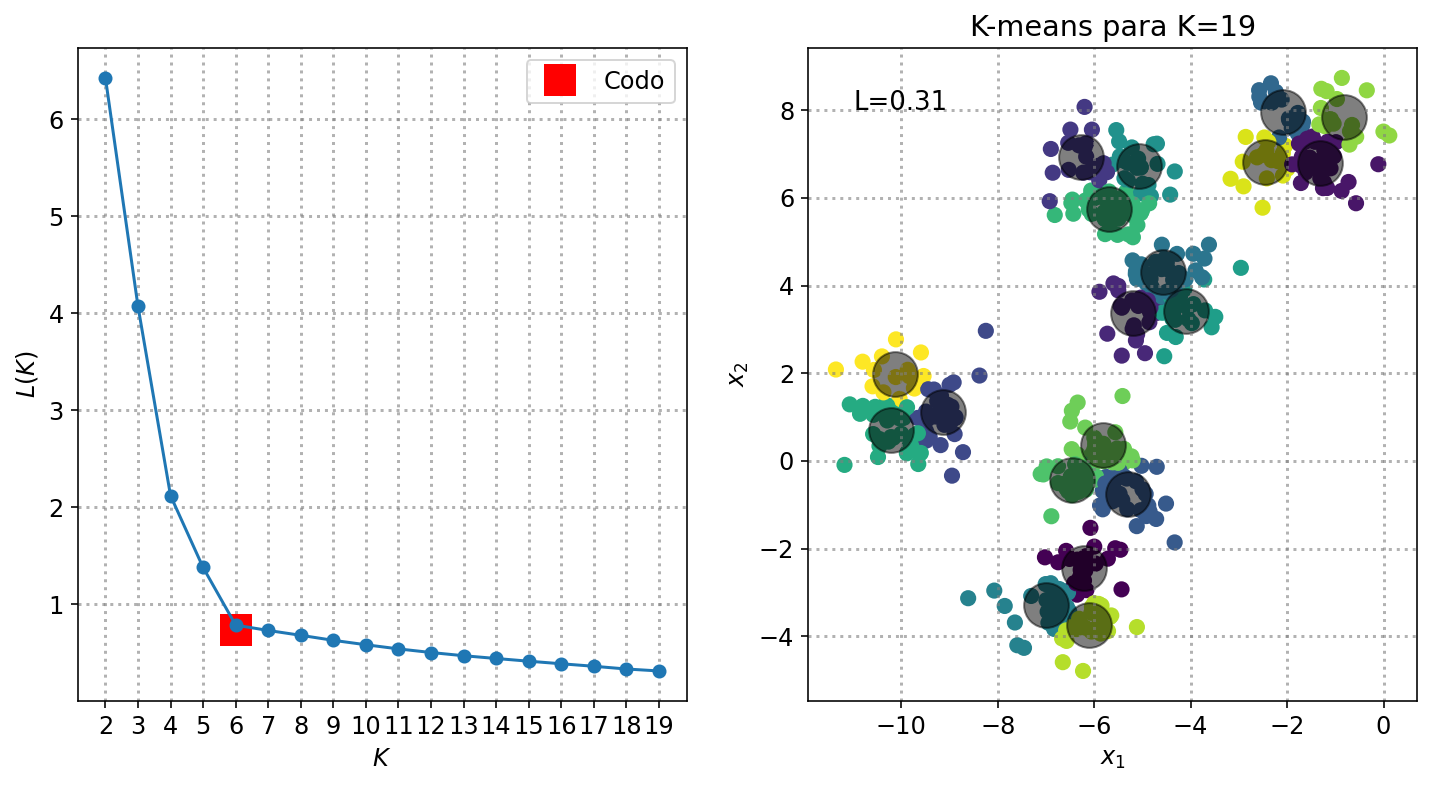

In [161]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(6,L[5],'rs',ms=15,label='Codo')
ax[0].plot(K_list,L,'-o')
ax[0].legend()

ax[0].set_xlabel('$K$')
ax[0].set_ylabel('$L(K)$')
ax[0].grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
ax[0].set_xticks(K_list);

ax[1].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

ax[1].scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5)

ax[1].grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)

ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
ax[1].text(-11, 8, 'L={0:.2f}'.format(kmeans.inertia_/X.shape[0]), fontsize=13)
ax[1].set_title('K-means para K={0:d}'.format(K_list[-1]))



Fijaos que $L(K)$ es una función monotona decreciente con $K$. De hecho, para $K=N$ tendremos un grupo por punto y por tanto haremos $L(K=N)=0$. Esto es un signo claro de **sobreajuste**. En general, dado $L(K)$ buscaremos aquel/aquellos valores de $K$ a partir de los cuales $L(K)$ desciende más lentamente, esto se denomina el **codo de la curva**. En el caso anterior coincide con $K=6$ el número de grupos que habíamos especificado al generar el dataset.

##  Coeficiente de silueta (silhouette score)
---

De forma alternativa a estudiar $L(K)$ para la selección del número $K$ de grupos, podemos utilizar el denominado coeficiente de silueta ([silhouette score](https://en.wikipedia.org/wiki/Silhouette_(clustering))). Este valor es una medida de cuán similar es un objeto a su propio cúmulo (cohesión) en comparación con otros cúmulos (separación).

Para cada punto $\mathbf{x}_n$, este coeficiente se calcula del siguiente modo

$$ s(\mathbf{x}_n) = \frac{b(\mathbf{x}_n)-a(\mathbf{x}_n)}{\max\Big\{b(\mathbf{x}_n),a(\mathbf{x}_n)\Big\}}$$

donde 

- para calcular $b(\mathbf{x}_n)$, calculamos el promedio de distancia de $\mathbf{x}_n$ a todos los puntos de cada grupo al que $\mathbf{x}_n$ **no pertenece**. $b(\mathbf{x}_n)$ es el mínimo entre esta distancia promedio por grupo. Por tanto, si $\mathbf{x}_n$ está en el grupo $i$

$$b(\mathbf{x}_n) = \min_{k\neq i} \frac{1}{N_k} \sum_{j\in\mathcal{C}_k} d(\mathbf{x}_n,\mathbf{x}_j)$$

- $a(\mathbf{x}_n)$ es la distancia promedio de $\mathbf{x}_n$ a todos los puntos de su grupo

$$a(\mathbf{x}_n) = \frac{1}{N_i-1} \sum_{j\in\mathcal{C}_i,i\neq n} d(\mathbf{x}_n,\mathbf{x}_j)$$


El valor del coeficiente de silueta está entre [-1, 1]. Una puntuación de 1 implica que el dato está cohesionado dentro del grupo al que pertenece y está lejos de los otros grupos. El peor valor es -1. Los valores cercanos a 0 denotan grupos superpuestos.

Con [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) podemos obtener el coeficiente promedio para todos los puntos.

Dibujemos el coeficiente silueta para distintos valores de $K$.

In [163]:
from sklearn.metrics import silhouette_score

K_list = range(2,20)

L = []
SC = []

for k in K_list:
    
    kmeans = KMeans(n_clusters=k,n_init = 10) # Para cada valor de $K$ lanzamos 10 veces K-means
    kmeans.fit(X)
    L.append((kmeans.inertia_)/(X.shape[0]))
    y_kmeans = kmeans.predict(X) # Obtenemos el identificador del grupo para cada dato
    SC.append(silhouette_score(X,y_kmeans))
    

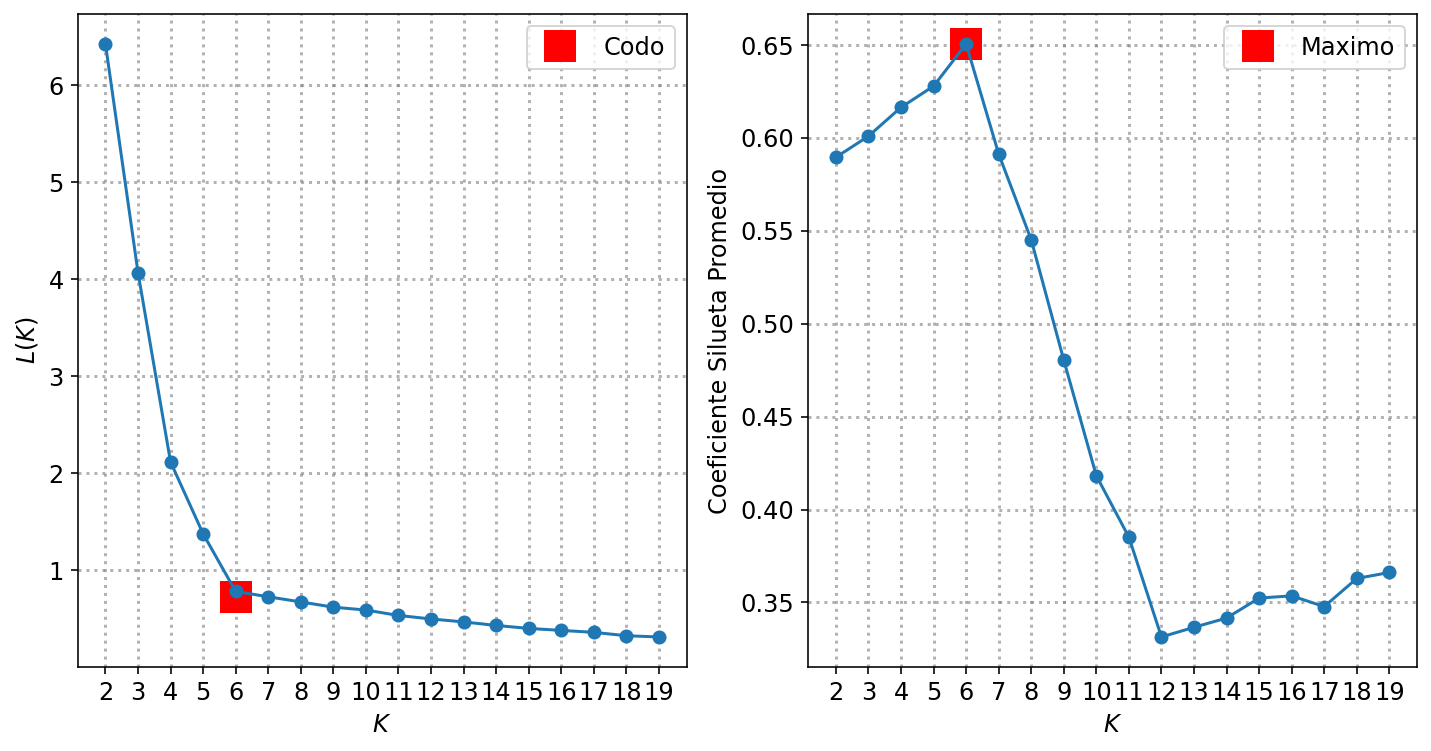

In [164]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(6,L[5],'rs',ms=15,label='Codo')
ax[0].plot(K_list,L,'-o')
ax[0].legend()
ax[0].set_xticks(K_list);

ax[0].set_xlabel('$K$')
ax[0].set_ylabel('$L(K)$')
ax[0].grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)

#ax[1].plot(6,L[5],'rs',ms=15,label='Codo')
ax[1].plot(K_list[np.argmax(SC)],np.max(SC),'rs',ms=15,label='Maximo')
ax[1].plot(K_list,SC,'-o')
ax[1].legend()

ax[1].set_xlabel('$K$')
ax[1].set_ylabel('Coeficiente Silueta Promedio')
ax[1].grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
ax[1].set_xticks(K_list);


Podemos observar que la determinación de $K=6$ en base a coeficiente de silueta parece más clara.

## K-means sobre la base de datos Wine
---

A continuación vamos a explorar la base de datos [Wine dataset](https://archive.ics.uci.edu/ml/datasets/Wine), que son el resultado de un análisis químico de vinos cultivados en la misma región en Italia pero de **tres variedades diferentes**. El análisis determinó las cantidades de 13 componentes encontrados en cada uno de los tres tipos de vinos.

Esta es una base de datos etiquetada (sabemos qué tipo de vino es cada dato). A modo de ejemplo, estudiaremos si K-means es capaz de separar las categorias de forma no supervisada.


In [13]:
data = load_wine()
data.head(3)

,Wine_type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_diluted,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


> **Ejercicio:** Excluyendo la columna `Wine_type`, estandarice la base de datos en media y varianza. A continuación, realice un agrupamiento de datos con K-means, usando el coeficiente de silueta para determinar el número adecuado de grupos.

In [14]:
from sklearn.preprocessing import StandardScaler

#<SOL>
data2 = data.drop(['Wine_type'], axis=1)
X0_vino = data2.values[:,:]
transformer = StandardScaler().fit(X0_vino)
X_vino = transformer.transform(X0_vino)
#</SOL>

In [15]:
#<SOL>
K = range(2,20)
SC = []
for k in K:
    kmeans = KMeans(n_clusters=k,n_init = 10) 
    kmeans.fit(X_vino)
    y_kmeans = kmeans.predict(X_vino)
    SC.append(silhouette_score(X_vino,y_kmeans))
#</SOL>

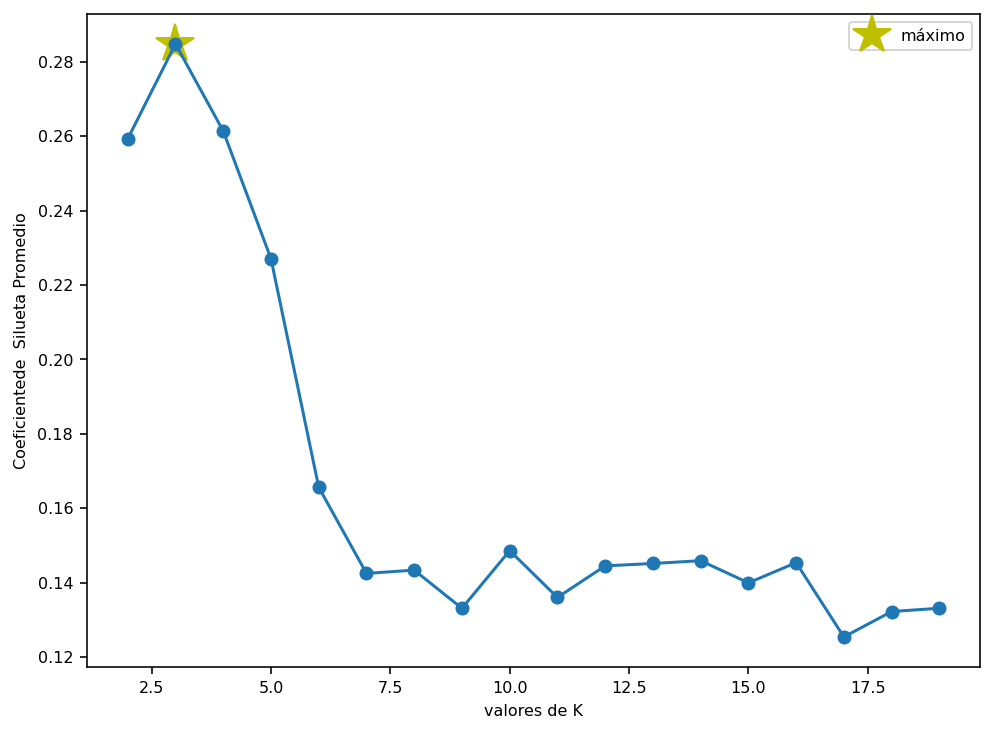

In [16]:
#<SOL>
plt.plot(K[np.argmax(SC)], np.max(SC),'y*', ms=20, label='máximo')
plt.plot(K, SC,'-o')
plt.xlabel('valores de K')
plt.ylabel('Coeficientede  Silueta Promedio')
plt.legend()
plt.show()
#</SOL>

> **Ejercicio:** Para el número $K$ de grupos seleccionado, estudie cómo las etiquetas verdaderas se distribuyen a lo largo de los grupos encontrados.

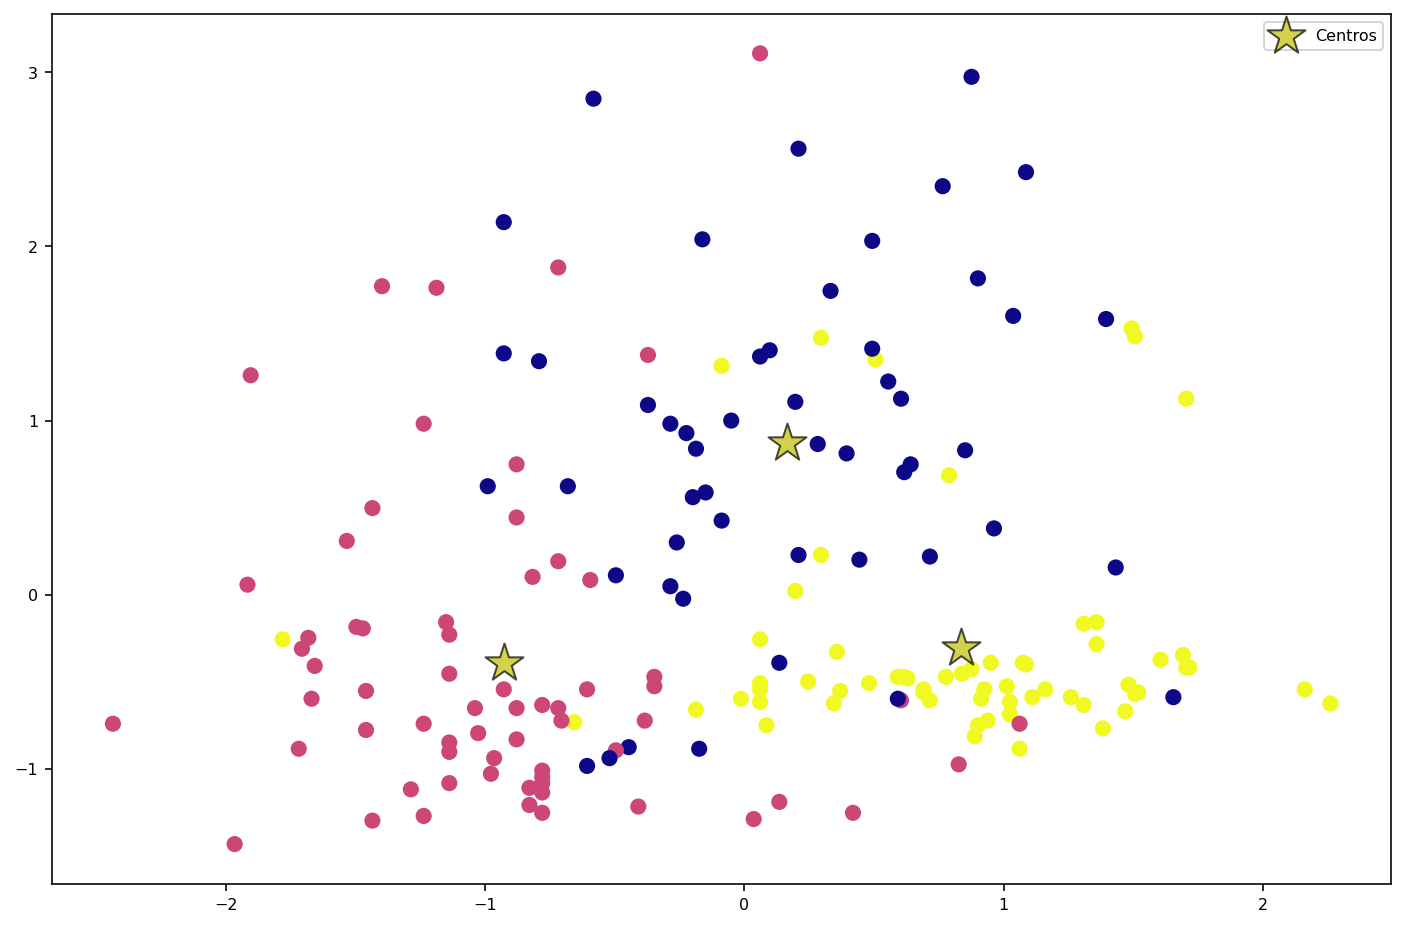

In [17]:
#<SOL>
K_max = K[np.argmax(SC)]
kmeans = KMeans(n_clusters=K_max, n_init=10)
kmeans.fit(X_vino) 
y_kmeans = kmeans.predict(X_vino) 
centers = kmeans.cluster_centers_

plt.figure(figsize=(12,8))
plt.scatter(X_vino[:, 0], X_vino[:, 1], c=y_kmeans, s=50, cmap='plasma')
plt.scatter(centers[:,0], centers[:,1], s=400 , c='y', marker='*', alpha=0.7, edgecolor='k', label='Centros')
plt.legend()
plt.show()
#</SOL>

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

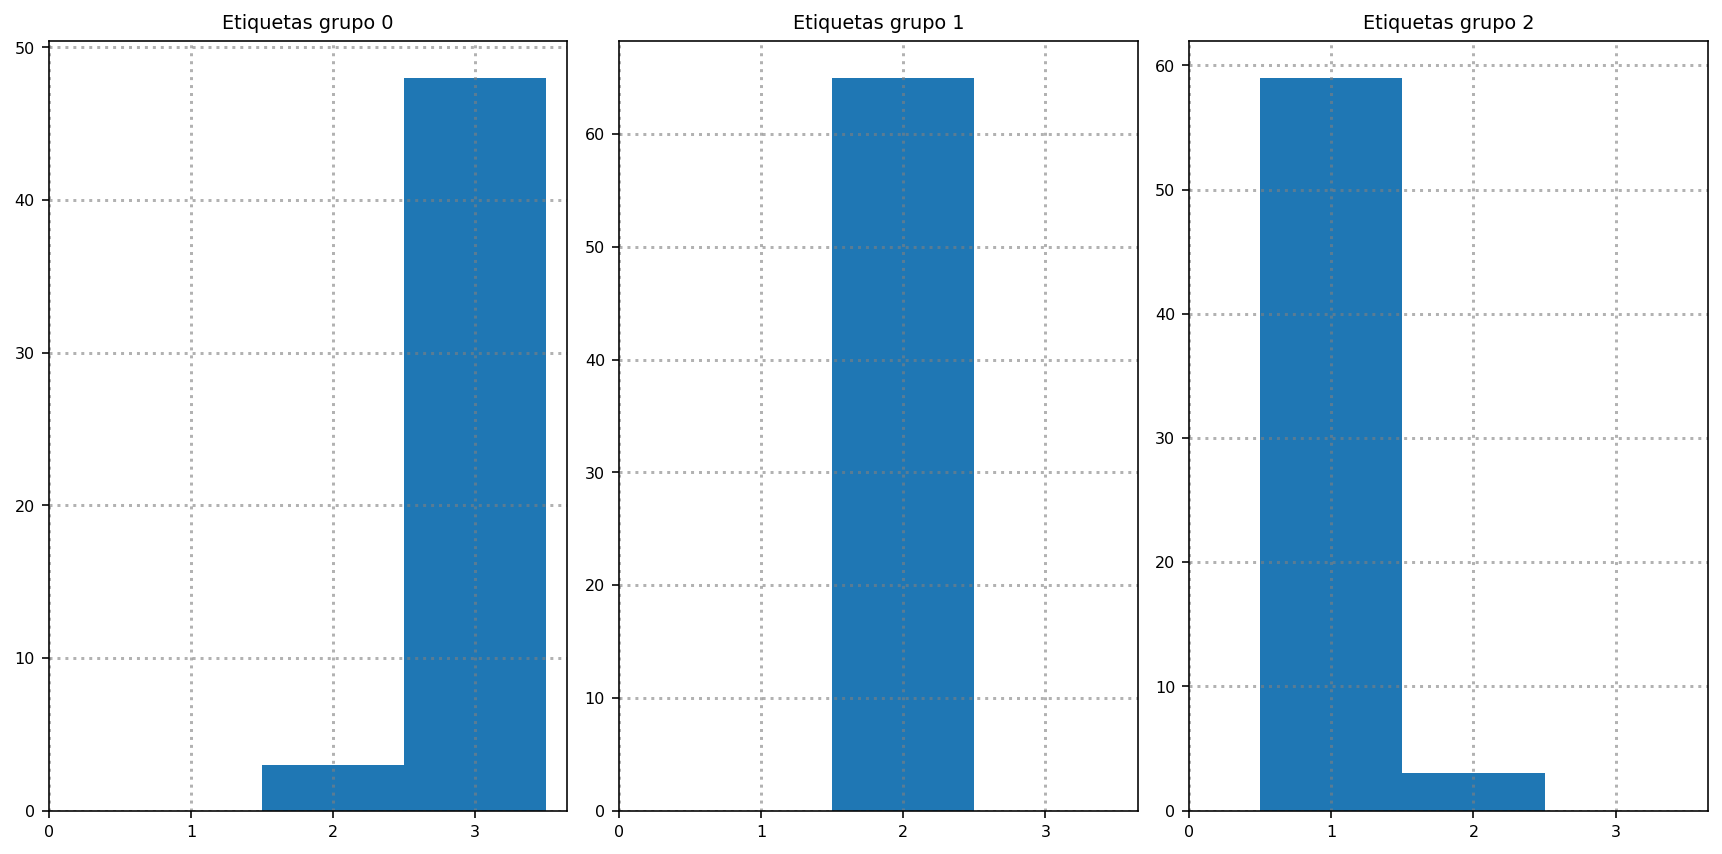

In [30]:
# Dibujemos el histograma de etiquetas REALES presentes en cada grupo

wine_types = data['Wine_type'] #<-- tipos de vinos, etiquetas reales

fig, ax = plt.subplots(nrows=1, ncols=K_max , figsize=(12, 6))

d = np.diff(np.unique(wine_types)).min()
left_of_first_bin = wine_types.min() - float(d)/2
right_of_last_bin = wine_types.max() + float(d)/2


for i in range(K_max):
    
    ax[i].hist(wine_types[y_kmeans==i], np.arange(left_of_first_bin, right_of_last_bin + d, d))
    ax[i].grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
    ax[i].set_title("Etiquetas grupo {0:d}".format(i))
    ax[i].set_xticks(np.arange(0,4))

plt.tight_layout()
plt.show()

Podemos comprobar cómo hay una correspondencia casi unívoca entre etiquetas y grupos.

<a id='GMM'></a>

# Parte III: Estimación de la densidad de probabilidad con modelos de mezcla de Gaussianas

Los [modelos de mezcla](http://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch20.pdf) son un tipo de modelo probabilístico de datos que permiten tanto aproximar la **densidad de probabilidad de los datos** como hacer **agrupamientos** de los mismos. 

En esta sesión, nos centramos en modelos de mezcla basados en distribuciones Gaussianas o [**Gaussian Mixture Models** (GMM)](https://brilliant.org/wiki/gaussian-mixture-model/). 


## Limitaciones de K-means

Usando GMMs, podemos solventar dos **limitaciones importantes** de K-means:

- K-means asume de forma implícita que los **grupos son circulares** (todos los puntos que están a la misma del centroide).

- K-means hace una asignación **dura** de cada punto a un grupo. No proporciona una medida de incertidumbre para identificar puntos que estan cerca de varios grupos.

Vamos a ilustrar estas limitaciones en un dataset sintético. Ejemplos tomados de esta [referencia](https://www.oreilly.com/library/view/python-data-science/9781491912126/).


In [ ]:
from scipy.spatial.distance import cdist

X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)

kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
centers = kmeans.cluster_centers_

fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
ax.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
ax.axis('equal')
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

for i,c in enumerate(centers):
    radio = np.linalg.norm(X[labels == i]-c,axis=1).max()
    ax.add_patch(plt.Circle(c,radio,alpha=0.2,lw=3))

ax.text(7, 5, 'A pesar de la cercanía de los grupos,  K-means da una \núnica asignación por dato', fontsize=15);

In [ ]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(4, n_init=10)
labels = kmeans.fit(X_stretched).predict(X_stretched)
centers = kmeans.cluster_centers_

fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(X_stretched[:, 0], X_stretched[:, 1], c=labels, s=40, cmap='viridis')
ax.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
ax.axis('equal')
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

for i,c in enumerate(centers):
    radio = np.linalg.norm(X_stretched[labels == i]-c,axis=1).max()
    ax.add_patch(plt.Circle(c,radio,alpha=0.2,lw=3))

ax.text(3.5, 2, 'Regiones circulares no parecen ser las adecuadas para \nadaptarse a estos datos', fontsize=15);

##  Modelos de mezcla de Gaussianas

En un GMM, ajustaremos a nuestros datos una función densidad de probabilidad parametrizada del siguiente modo:

\begin{align}
p(\mathbf{x}) = \sum_{k=1}^{K} \pi_k \mathcal{N}(\mathbf{x}|\mathbf{\mu}_k,\mathbf{\Sigma}_k)
\end{align}

donde

- $\pi_k$ es la probabilidad de que el dato provenga del grupo $k$-ésimo.


- Asumimos que todos los datos asignados al grupo $k$-ésimo se distribuyen según una Gaussiana de media $\mathbf{\mu}_k$ y matriz de covarianza $\mathbf{\Sigma}_k$. 


- $(\pi_1,\ldots,\pi_K)$, $(\mathbf{\mu}_1,\ldots,\mathbf{\mu}_K)$, $(\mathbf{\Sigma}_1,\ldots,\mathbf{\Sigma}_K)$ son los **parámetros del modelo**.

## Entrenamiento de un GMM

Los parámetros del modelo se escogen para maximizar la **probabilidad de los datos ya observados o evidencia**:

$$ \max_{(\pi_1,\ldots,\pi_K),(\mathbf{\mu}_1,\ldots,\mathbf{\mu}_K), (\mathbf{\Sigma}_1,\ldots,\mathbf{\Sigma}_K)}  ~~\sum_{n=1}^{N} \log  p(\mathbf{x}_n) $$

Este problema se resuelve de forma numérica mediante un algoritmo iterativo conocido como **EM** (Expectation-Maximization).

Vamos a entrenar un GMM usando [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) sobre el último ejemplo con el que hemos trabajado.

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(X_stretched[:, 0], X_stretched[:, 1], s=40, cmap='viridis')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)

In [ ]:
from sklearn.mixture import GaussianMixture

# Seguimos teniendo mínimos locales. Relanzamos 10 veces y nos quedamos con el mejor
# Full para matrices de covarianza completas

gmm = GaussianMixture(n_components=K,covariance_type='full',n_init=10) 

gmm.fit(X_stretched) 


Dibujemos las medias $(\mathbf{\mu}_1,\ldots,\mathbf{\mu}_K)$ sobre los datos. Estos valores están accesibles a través de `gmm.means_`.

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(X_stretched[:, 0], X_stretched[:, 1], s=40, cmap='viridis')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)

ax.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='black', s=200, alpha=0.5)

Y ahora las curvas de contorno, esto es, las curvas sobre el espacio $(x_1,x_2)$ con igual probabilidad $p(\mathbf{x})$. También la propia $p(\mathbf{x})$ en una figura en 3D.

In [ ]:
from scipy.stats import multivariate_normal as mvn # Distribución normal/Gaussiana multivaraible
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Dibujemos el contorno de la función de densidad
intervals = 200

# Creamos una rejilla
x = np.linspace(-3, 3, intervals)
y = np.linspace(-1.5, 4.5, intervals)

X,Y = np.meshgrid(x,y)

xys = np.vstack([X.ravel(), Y.ravel()]).T

# Evaluamos p(x) para cada punto de la rejilla

K=4

Zgmm = np.zeros(len(xys))
for k in range(K):
    Zgmm += gmm.weights_[k]*mvn(gmm.means_[k,:], gmm.covariances_[k]).pdf(xys)
    
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 2, 1)

Zgmm = Zgmm.reshape([intervals,intervals])
ax.contour(X, Y, Zgmm, 20, cmap=cm.coolwarm) 
ax.scatter(X_stretched[:, 0], X_stretched[:, 1], s=40, cmap='viridis')
ax.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(X, Y, Zgmm, cmap=cm.coolwarm)
ax.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


## Agrupando datos usando un GMM

Una vez ajustado el GMM, dado un dato $\bf x$, podemos calcular la **probabilidad a posteriori** del grupo a partir de la cual se generó dicho dato:


$$P(\text{cluster}=k|\mathbf{x})= \frac{\pi_{k} \mathcal{N}(\mathbf{x}|\mathbf{\mu}_{k},\mathbf{\Sigma}_{k})}{\sum_{q=1}^K \pi_{q} \mathcal{N}(\mathbf{x}|\mathbf{\mu}_{q},\mathbf{\Sigma}_{q})}$$

Esto significa que tenemos una **probabilidad de pertenecer a cada grupo**, en lugar de una asignación dura que es lo que proporcionaba K-means.

En Sklearn, podemos calcular dichas probabilidades usando el método `predict_proba`. Analicemos estas probabilidades para los 4 puntos marcados con cruces en la siguiente figura.

In [ ]:
puntos = [[0,1.5],[-1,2],[2,1],[2,4]]

fig,ax = plt.subplots(figsize=(7, 7))

Zgmm = Zgmm.reshape([intervals,intervals])
ax.contour(X, Y, Zgmm, 20, cmap=cm.coolwarm) 
ax.scatter(X_stretched[:, 0], X_stretched[:, 1], s=40, cmap='viridis')
for p in puntos:
    ax.plot(p[0],p[1],'gx',ms=15,markeredgewidth=4)
ax.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');


In [ ]:
np.set_printoptions(suppress=True)
np.set_printoptions(precision=2)

for p in puntos:
    
    print("Las probabilidades del punto ({0:.1f},{1:.1f}) son".format(p[0],p[1]))
    print(gmm.predict_proba(np.array(p).reshape([1,-1]))) 

Por otra parte, el método `gmm.predict(X)` devuelve el índice del grupo más probable.

## Selección del número $K$ de grupo en la mezcla

De forma similar a lo que ocurre en K-means, a medida que aumentamos el número de grupos en un GMM la probabilidad de los datos en nuestro modelo aumenta. 

In [ ]:
K_list = range(1,20)

P = []

for k in K_list:
    
    gmm = GaussianMixture(n_components=k,covariance_type='full',n_init=10) 

    gmm.fit(X_stretched) 
    
    P.append(gmm.score(X_stretched))
    


In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.plot(4,P[3],'rs',ms=15,label='Codo')
ax.plot(K_list,P,'-o')
ax.legend()
ax.set_xlabel('$K$')
ax.set_ylabel('Log-probabilidad promedio de los datos')
ax.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
ax.set_xticks(K_list);

En la figura anterior podemos comprobar cómo la probabilidad de los datos aumenta más lentamente a partir de $K=4$, este comportamiento tipo codo nos sugiere que este valor es razonable y que a partir del mismo tenderemos a sobreajustar.

Existen varios criterios que nos permiten evaluar la probabilidad de los datos **con una penalización asociada a la complejidad del modelo** (número de grupos y por tanto número de parámetros que se han ajustado). Entre ellas, la **métrica BIC** (Bayesian Information Criterion) es usada habitualmente. A menor BIC, entendemos que el modelo tiene un mejor **compromiso entre explicabilidad y complejidad**.

En Sklearn, podemos obtener la métrica BIC con el método `gmm.bic(X)`.

In [ ]:
K_list = range(1,20)

BIC = []

for k in K_list:
    
    gmm = GaussianMixture(n_components=k,covariance_type='full',n_init=10) 

    gmm.fit(X_stretched) 
    
    BIC.append(gmm.bic(X_stretched))
    

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.plot(K_list[np.argmin(BIC)],np.min(BIC),'rs',ms=15,label='Mínimo')
ax.plot(K_list,BIC,'-o')
ax.set_xlabel('$K$')
ax.set_ylabel('BIC score')
ax.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
ax.set_xticks(K_list)

ax.text(21, 2000, 'La elección $K=4$ es evidente a la vista de la métrica BIC', fontsize=15);

> **Ejercicio**: Utilizando el método `gmm.predict`, calcule el coeficiente de silueta para distintos valores de $K$ y dibuje la solución. ¿Es el valor $K=4$ también el más adecuado de acuerdo a esta métrica?

In [ ]:
#<SOL>

#</SOL>

In [ ]:
#<SOL>

#</SOL>

Al basarse en distancias euclídeas, esta métrica funciona mejor para grupos de tipo circular. En este caso, el análisis de esta métrica no coincide con el BIC del GMM.

> **Ejercicio:** Utilice un GMM para explicar los datos del dataset Wine. Represente  en función del número K de grupos la métrica BIC  y el coeficiente de silueta usando el grupo más probable.

In [ ]:
#<SOL>

#</SOL> 

In [ ]:
#<SOL>

#</SOL>

Podemos observar cómo el coeficiente de silueta indica el número correcto de etiquetas. Si bien la diferencia con $K=2$ y $K=3$ es reducida.